# 5.0 Results

### Trial 3

In [1]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 5.1 Kfold Cross-Validation Accuracy

### Improved Augmented Dataset | Feature Set 2 | Xa | 128 Features

In [2]:
aug_data = pd.read_csv("data/training/pose_data_aug_res2.csv")
Xa = aug_data.iloc[:,4:]
ya = aug_data['label'].values
poses = aug_data['label'].values

Xa

,landmark_00_x,landmark_00_y,landmark_00_z,landmark_01_x,landmark_01_y,landmark_01_z,landmark_02_x,landmark_02_y,landmark_02_z,landmark_03_x,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle
0,0.156662,0.854728,-0.226705,0.176508,0.865127,-0.255778,0.180816,0.863737,-0.256390,0.185507,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
1,0.193649,0.854728,-0.196057,0.218242,0.865127,-0.221242,0.222591,0.863737,-0.221096,0.227196,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
2,0.224752,0.854728,-0.159452,0.253345,0.865127,-0.179984,0.257602,0.863737,-0.179085,0.261982,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
3,0.249026,0.854728,-0.118002,0.280750,0.865127,-0.133256,0.284787,0.863737,-0.131632,0.288807,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
4,0.265733,0.854728,-0.072966,0.299624,0.865127,-0.082480,0.303318,0.863737,-0.080179,0.306858,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,0.221597,0.731075,-0.655868,0.241815,0.751349,-0.633527,0.239539,0.752497,-0.631352,0.237434,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19580,0.332121,0.731075,-0.607424,0.348152,0.751349,-0.581912,0.345533,0.752497,-0.580165,0.343013,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19581,0.432553,0.731075,-0.540524,0.443911,0.751349,-0.512615,0.441028,0.752497,-0.511350,0.438171,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19582,0.519843,0.731075,-0.457200,0.526182,0.751349,-0.427743,0.523123,0.752497,-0.426997,0.520014,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231


### Improved Augmented Dataset | Feature Set 3 | Xs | 65 Features

Reduced redundunt or seemingly irrelevant features

In [3]:
Xs = pd.concat([aug_data.iloc[:, 37:55], aug_data.iloc[:, 73:91], aug_data.iloc[:, 103:]],axis=1)
Xs

,landmark_11_x,landmark_11_y,landmark_11_z,landmark_12_x,landmark_12_y,landmark_12_z,landmark_13_x,landmark_13_y,landmark_13_z,landmark_14_x,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle
0,0.279413,0.771061,-0.435189,0.248066,0.756413,0.106925,0.421668,0.790090,-0.673231,0.381415,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
1,0.350738,0.771061,-0.380058,0.225730,0.756413,0.148377,0.532167,0.790090,-0.589781,0.356650,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
2,0.411406,0.771061,-0.313379,0.196536,0.756413,0.185320,0.626496,0.790090,-0.488412,0.321050,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
3,0.459574,0.771061,-0.237179,0.161369,0.756413,0.216633,0.701790,0.790090,-0.372201,0.275694,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
4,0.493777,0.771061,-0.153771,0.121300,0.756413,0.241363,0.755761,0.790090,-0.244682,0.221961,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,0.402962,0.681036,-0.374963,-0.005541,0.721055,-0.671776,0.420130,0.568967,-0.269836,-0.143018,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19580,0.461952,0.681036,-0.299293,0.111196,0.721055,-0.662532,0.460604,0.568967,-0.192781,-0.037050,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19581,0.506906,0.681036,-0.214529,0.224554,0.721055,-0.633158,0.487082,0.568967,-0.109870,0.070044,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19582,0.536457,0.681036,-0.123247,0.331089,0.721055,-0.584545,0.498761,0.568967,-0.023619,0.175009,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231


### Improved Augmented Dataset | Feature Set 4 | Xf | 29 Features

Only retaining the nose landmark and all feature creations

In [4]:
Xf = aug_data.iloc[:, 103:]
Xf

,head_x,head_y,head_z,chest_x,chest_y,chest_z,stomach_x,stomach_y,stomach_z,hip_x,...,d_elbows,d_knees,d_ankles,a_nose_to_rgt_shoulder,a_nose_to_lft_shoulder,a_mid_hip_to_knees,a_lft_shoulder_to_wrist,a_lft_hip_to_ankle,a_rgt_shoulder_to_wrist,a_rgt_hip_to_ankle
0,0.180861,0.855001,-0.214667,0.263740,0.763737,-0.164132,0.329863,0.656423,-0.082070,0.395987,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
1,0.215390,0.855001,-0.179999,0.288234,0.763737,-0.115841,0.339103,0.656423,-0.023543,0.389973,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
2,0.243374,0.855001,-0.139862,0.303971,0.763737,-0.064030,0.338040,0.656423,0.035699,0.372109,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
3,0.263963,0.855001,-0.095476,0.310471,0.763737,-0.010273,0.326705,0.656423,0.093857,0.342939,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
4,0.276533,0.855001,-0.048189,0.307538,0.763737,0.043796,0.305444,0.656423,0.149163,0.303349,...,0.7847,0.4529,0.5992,67.5579,112.4421,121.3078,118.9944,119.0912,177.0366,141.0389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,0.215708,0.745179,-0.642808,0.198711,0.701046,-0.523370,0.221355,0.601460,-0.407183,0.243999,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19580,0.324053,0.745179,-0.595585,0.286574,0.701046,-0.480913,0.288699,0.601460,-0.362559,0.290823,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19581,0.422552,0.745179,-0.530266,0.365730,0.701046,-0.423844,0.347270,0.601460,-0.306919,0.328811,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231
19582,0.508212,0.745179,-0.448834,0.433773,0.701046,-0.353896,0.395290,0.601460,-0.241953,0.356807,...,0.6759,0.5520,0.6271,116.5380,63.4620,154.1874,159.0989,59.3940,98.2172,120.2231


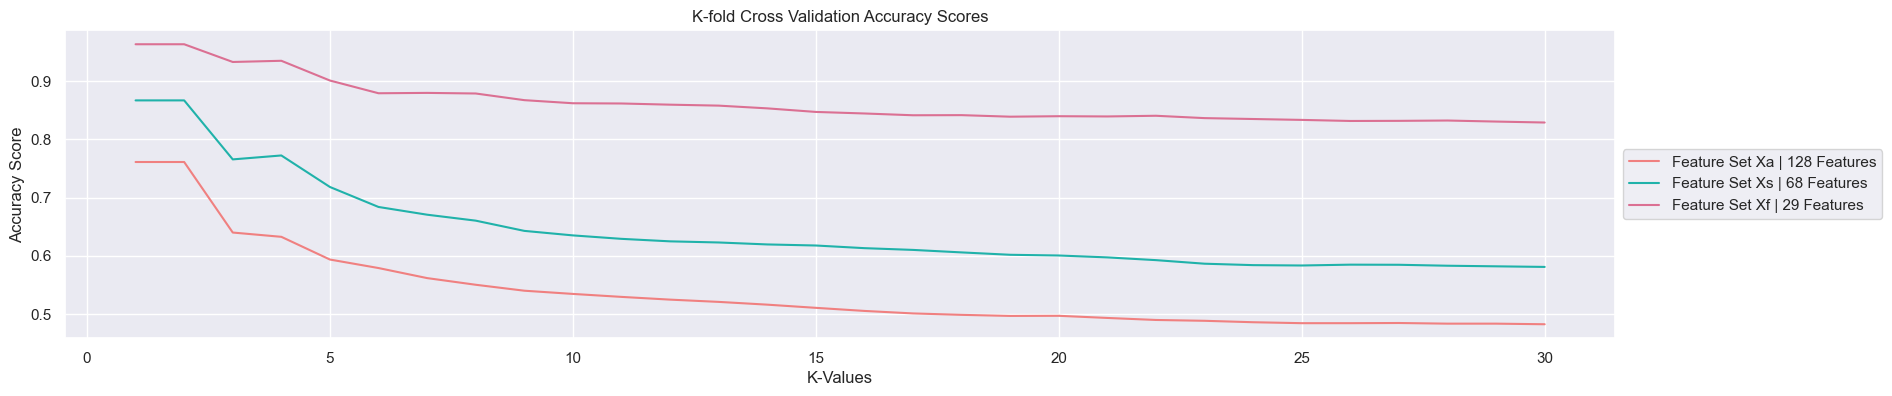

In [5]:
scaler = StandardScaler()
Xa_scaled = scaler.fit_transform(Xa)
Xs_scaled = scaler.fit_transform(Xs)
Xf_scaled = scaler.fit_transform(Xf)

k_values = [i for i in range(1, 31)]

scores_Xa = []
scores_Xs = []
scores_Xf = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine', weights='distance')
        
    knn.fit(Xa_scaled, ya)
    score_Xa = cross_val_score(knn, Xa_scaled, ya, cv=8, scoring='accuracy')
    scores_Xa.append(np.mean(score_Xa))

    knn.fit(Xs_scaled, ya)
    score_Xs = cross_val_score(knn, Xs_scaled, ya, cv=8, scoring='accuracy')
    scores_Xs.append(np.mean(score_Xs))

    knn.fit(Xf_scaled, ya)
    score_Xf = cross_val_score(knn, Xf_scaled, ya, cv=8, scoring='accuracy')
    scores_Xf.append(np.mean(score_Xf))

sns.set(rc={'figure.figsize':(20,4)})
sns.lineplot(x = k_values, y = scores_Xa, markers='o', color='lightcoral', label='Feature Set Xa | 128 Features')
sns.lineplot(x = k_values, y = scores_Xs, markers='o', color='lightseagreen', label='Feature Set Xs | 68 Features')
sns.lineplot(x = k_values, y = scores_Xf, markers='o', color='palevioletred', label='Feature Set Xf | 29 Features')
plt.xlabel('K-Values')
plt.ylabel('Accuracy Score')
plt.title("K-fold Cross Validation Accuracy Scores")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("results_kfold_cross_validation.png", bbox_inches='tight', dpi=150)
plt.show()

In [7]:
idx_max_Xa = np.argmax(scores_Xa)
optimal_k_Xa = k_values[idx_max_Xa]
max_accuracy_Xa = scores_Xa[idx_max_Xa]

idx_max_Xs = np.argmax(scores_Xs)
optimal_k_Xs = k_values[idx_max_Xs]
max_accuracy_Xs = scores_Xs[idx_max_Xs]

idx_max_Xf = np.argmax(scores_Xf)
optimal_k_Xf = k_values[idx_max_Xf]
max_accuracy_Xf = scores_Xf[idx_max_Xf]

print(f"Optimal K (Xa): {optimal_k_Xa} - Max Accuracy: {max_accuracy_Xa:.4f}")
print(f"Optimal K (Xs): {optimal_k_Xs} - Max Accuracy: {max_accuracy_Xs:.4f}")
print(f"Optimal K (Xf): {optimal_k_Xf} - Max Accuracy: {max_accuracy_Xf:.4f}")

Optimal K (Xa): 1 - Max Accuracy: 0.7610
Optimal K (Xs): 1 - Max Accuracy: 0.8668
Optimal K (Xf): 1 - Max Accuracy: 0.9632


## 5.2 Principal Component Analysis

In [8]:
Xa_pca = PCA(n_components=len(Xa.columns))
Xa_pca.fit_transform(Xa)
Xa_var = np.cumsum(np.round(Xa_pca.explained_variance_ratio_,decimals=3)*100)

Xs_pca = PCA(n_components=len(Xs.columns))
Xs_pca.fit_transform(Xs)
Xs_var = np.cumsum(np.round(Xs_pca.explained_variance_ratio_,decimals=3)*100)

Xf_pca = PCA(n_components=len(Xf.columns))
Xf_pca.fit_transform(Xf)
Xf_var = np.cumsum(np.round(Xf_pca.explained_variance_ratio_,decimals=3)*100)

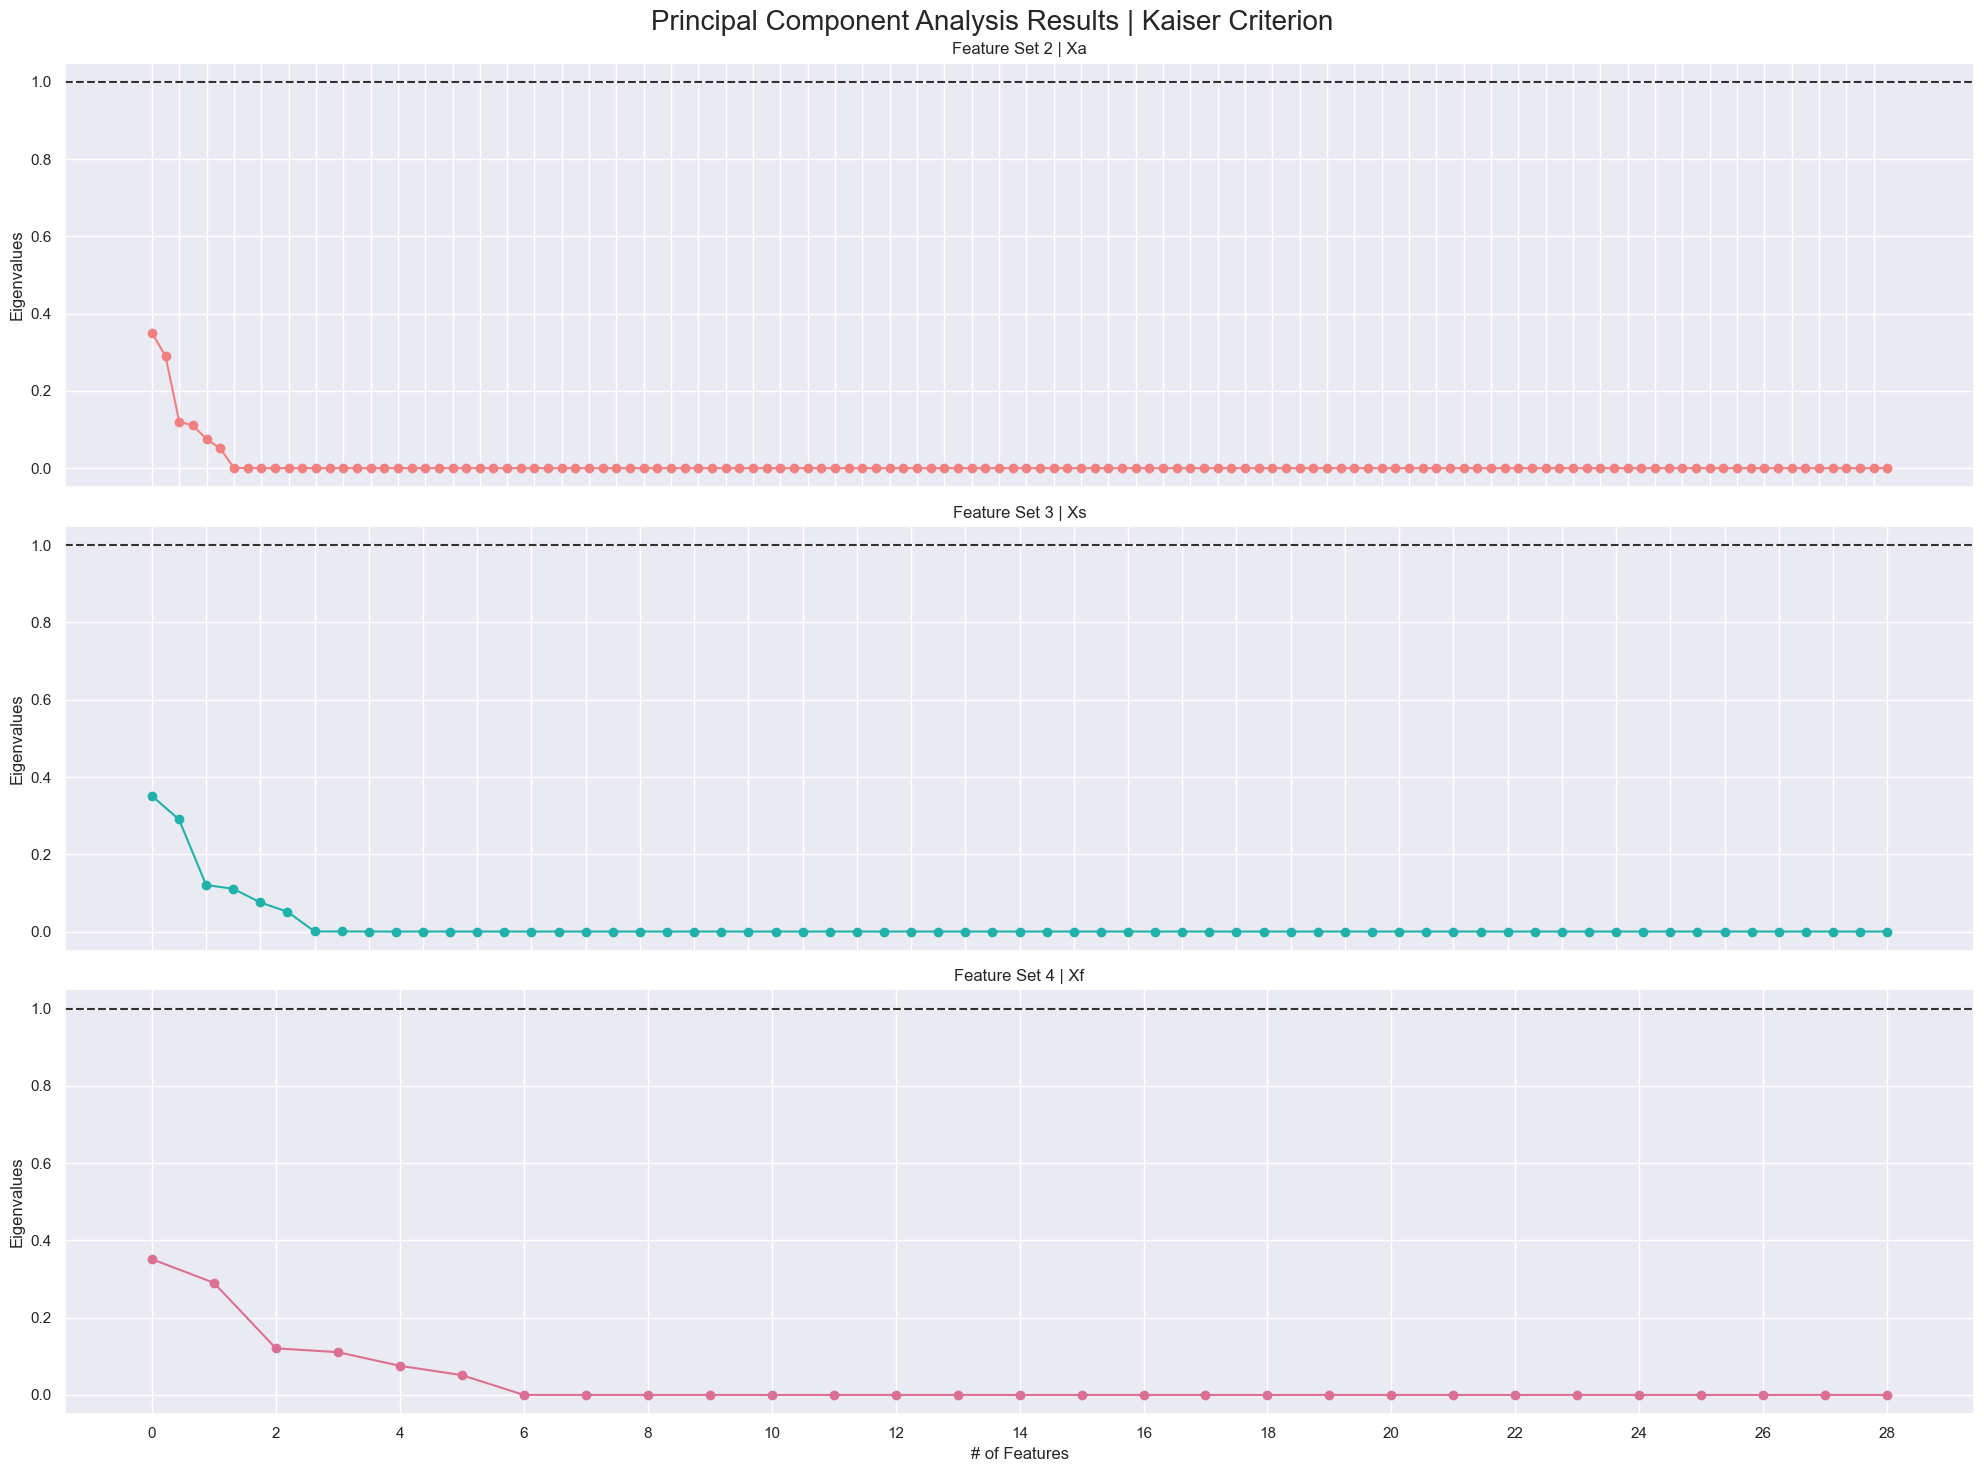

In [9]:
fig, axs = plt.subplots(3, figsize=(20, 15))

# Feature Set 2 | Xa
axs[0].plot(Xa_pca.explained_variance_ratio_, marker='o', label='Feature Set Xa', color='lightcoral')
axs[0].set_title('Feature Set 2 | Xa')
axs[0].axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
axs[0].grid(True)
axs[0].set_xlabel("# of Features")
axs[0].set_ylabel("Eigenvalues")
axs[0].set_xticks(np.arange(0, len(Xa_var), step=2))

# Feature Set 3 | Xs
axs[1].plot(Xs_pca.explained_variance_ratio_, marker='o', label='Feature Set Xs', color='lightseagreen')
axs[1].set_title('Feature Set 3 | Xs')
axs[1].axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
axs[1].grid(True)
axs[1].set_xlabel("# of Features")
axs[1].set_ylabel("Eigenvalues")
axs[1].set_xticks(np.arange(0, len(Xs_var), step=2))

# Feature Set 4 | Xf
axs[2].plot(Xf_pca.explained_variance_ratio_, marker='o', label='Feature Set Xf', color='palevioletred')
axs[2].set_title('Feature Set 4 | Xf')
axs[2].axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
axs[2].grid(True)
axs[2].set_xlabel("# of Features")
axs[2].set_ylabel("Eigenvalues")
axs[2].set_xticks(np.arange(0, len(Xf_var), step=2))

for ax in axs.flat:
    ax.label_outer()

plt.suptitle("Principal Component Analysis Results | Kaiser Criterion", fontsize=20)
plt.savefig("trial3_pca_kaiser_criterion.png", bbox_inches='tight', dpi=150)
plt.tight_layout()
plt.show()

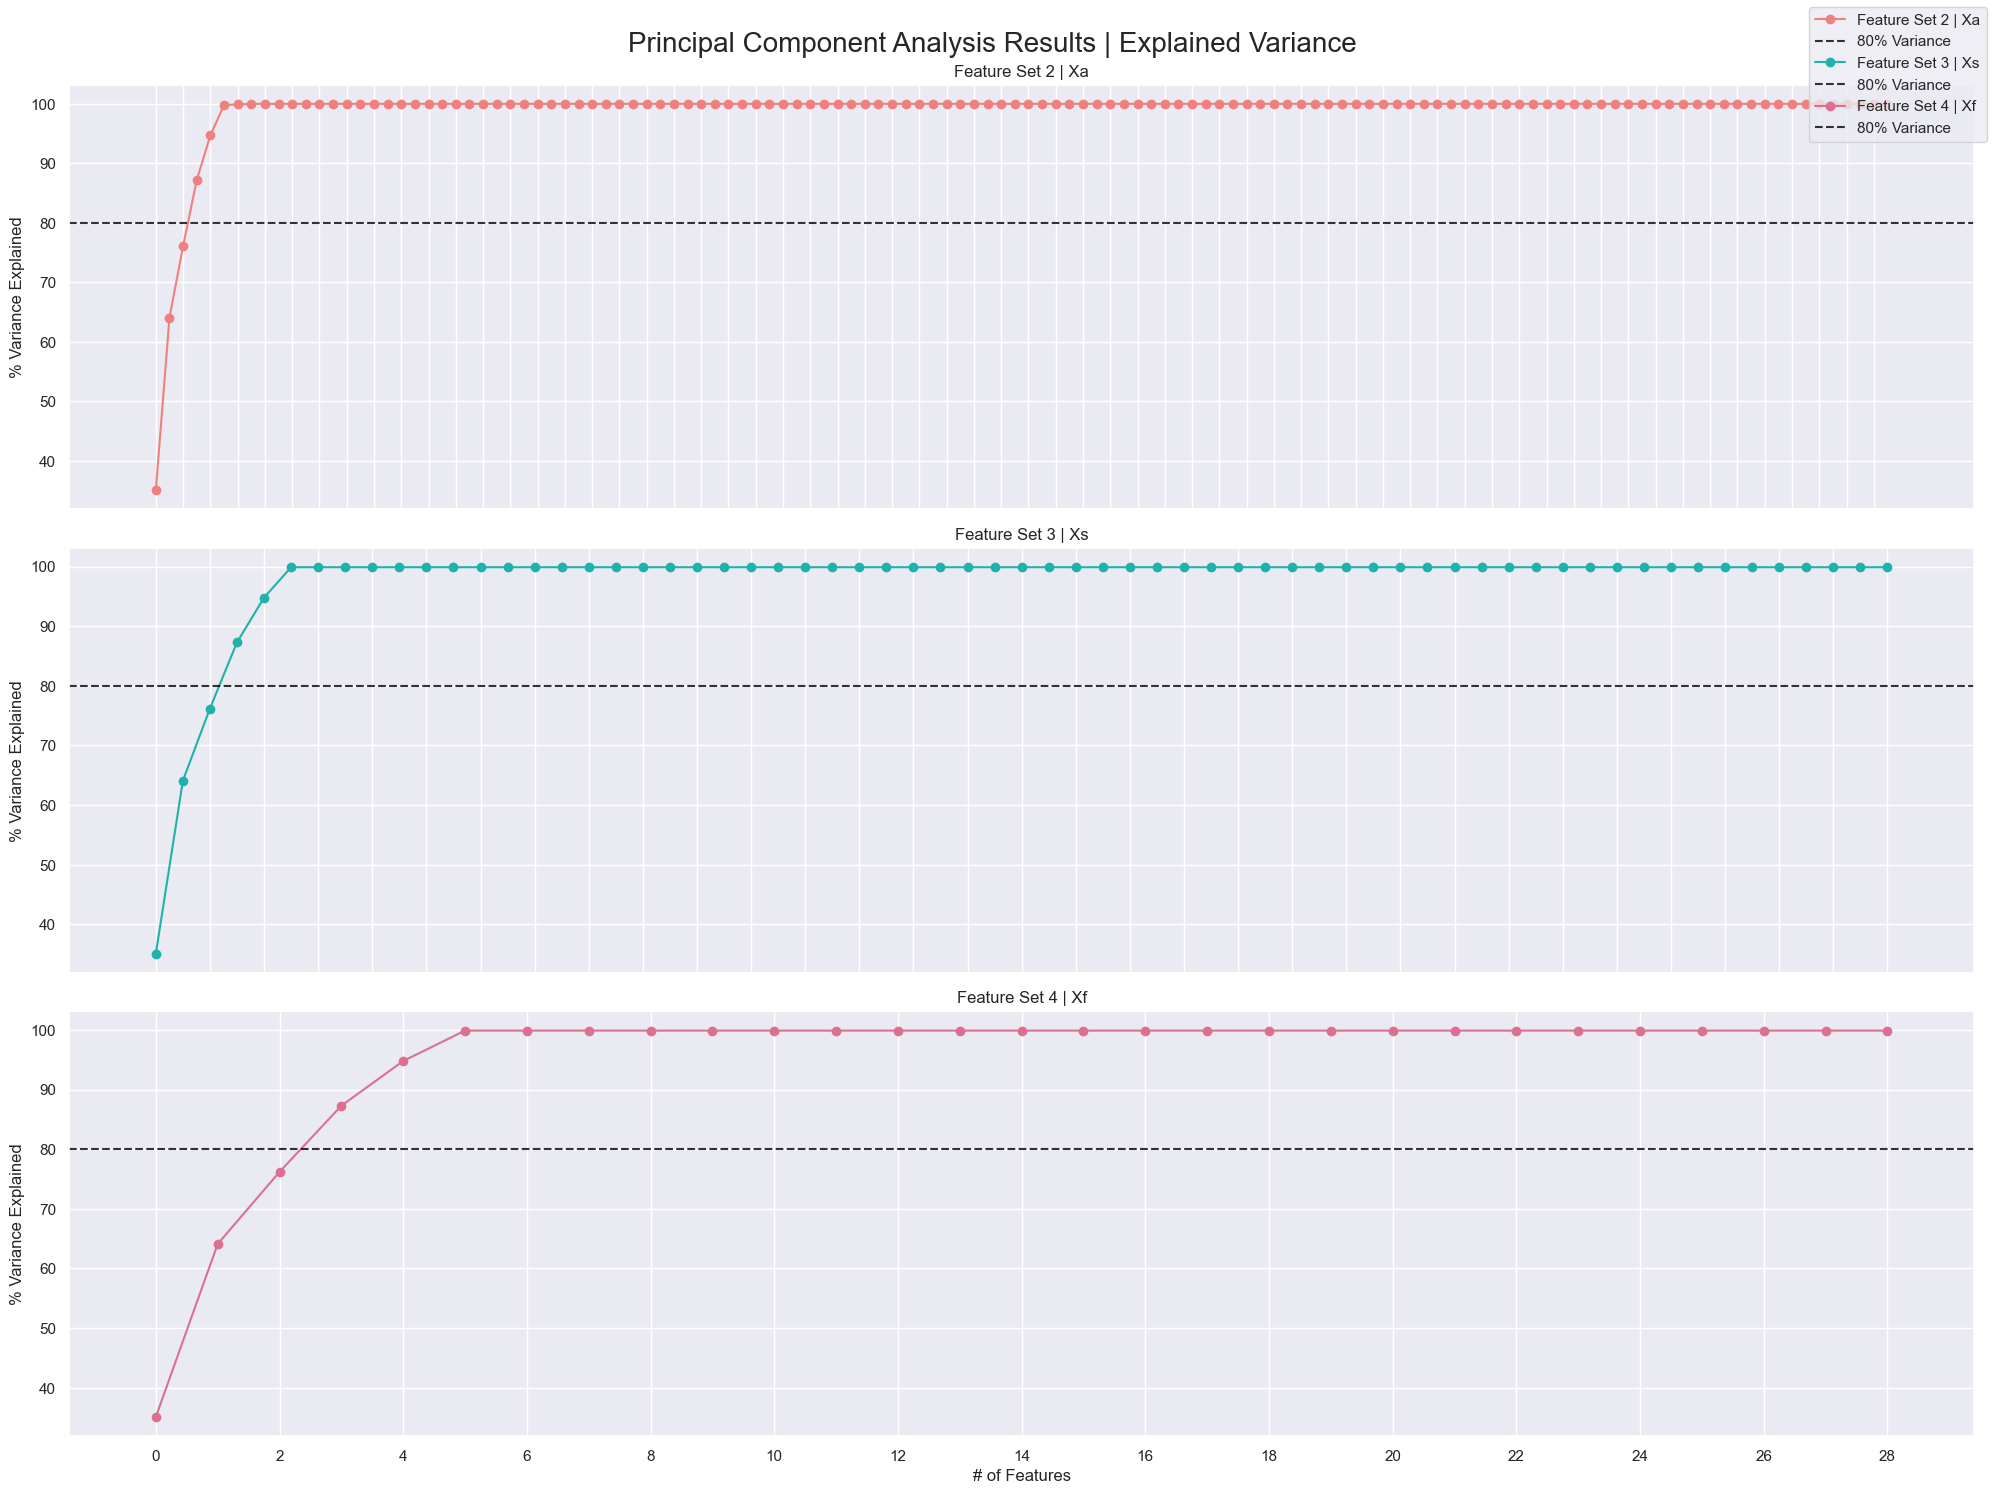

In [10]:
fig, axs = plt.subplots(3, figsize=(20, 15))

# Feature Set 2 | Xa
axs[0].plot(Xa_var, marker='o', label='Feature Set 2 | Xa', color='lightcoral')
axs[0].set_title('Feature Set 2 | Xa')
axs[0].axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
axs[0].grid(True)
axs[0].set_xlabel("# of Features")
axs[0].set_ylabel("% Variance Explained")
axs[0].set_xticks(np.arange(0, len(Xa_var), step=2))

# Feature Set 3 | Xs
axs[1].plot(Xs_var, marker='o', label='Feature Set 3 | Xs', color='lightseagreen')
axs[1].set_title('Feature Set 3 | Xs')
axs[1].axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
axs[1].grid(True)
axs[1].set_xlabel("# of Features")
axs[1].set_ylabel("% Variance Explained")
axs[1].set_xticks(np.arange(0, len(Xs_var), step=2))

# Feature Set 4 | Xf
axs[2].plot(Xf_var, marker='o', label='Feature Set 4 | Xf', color='palevioletred')
axs[2].set_title('Feature Set 4 | Xf')
axs[2].axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
axs[2].grid(True)
axs[2].set_xlabel("# of Features")
axs[2].set_ylabel("% Variance Explained")
axs[2].set_xticks(np.arange(0, len(Xf_var), step=2))

for ax in axs.flat:
    ax.label_outer()

fig.legend(loc='upper right')
plt.suptitle("Principal Component Analysis Results | Explained Variance", fontsize=20)
plt.savefig("trial3_pca_components.png", bbox_inches='tight', dpi=150)
plt.tight_layout()
plt.show()

## 5.3 Linear Discriminant Analysis

### Improved Augmented Dataset | Feature Set 2 | Xa

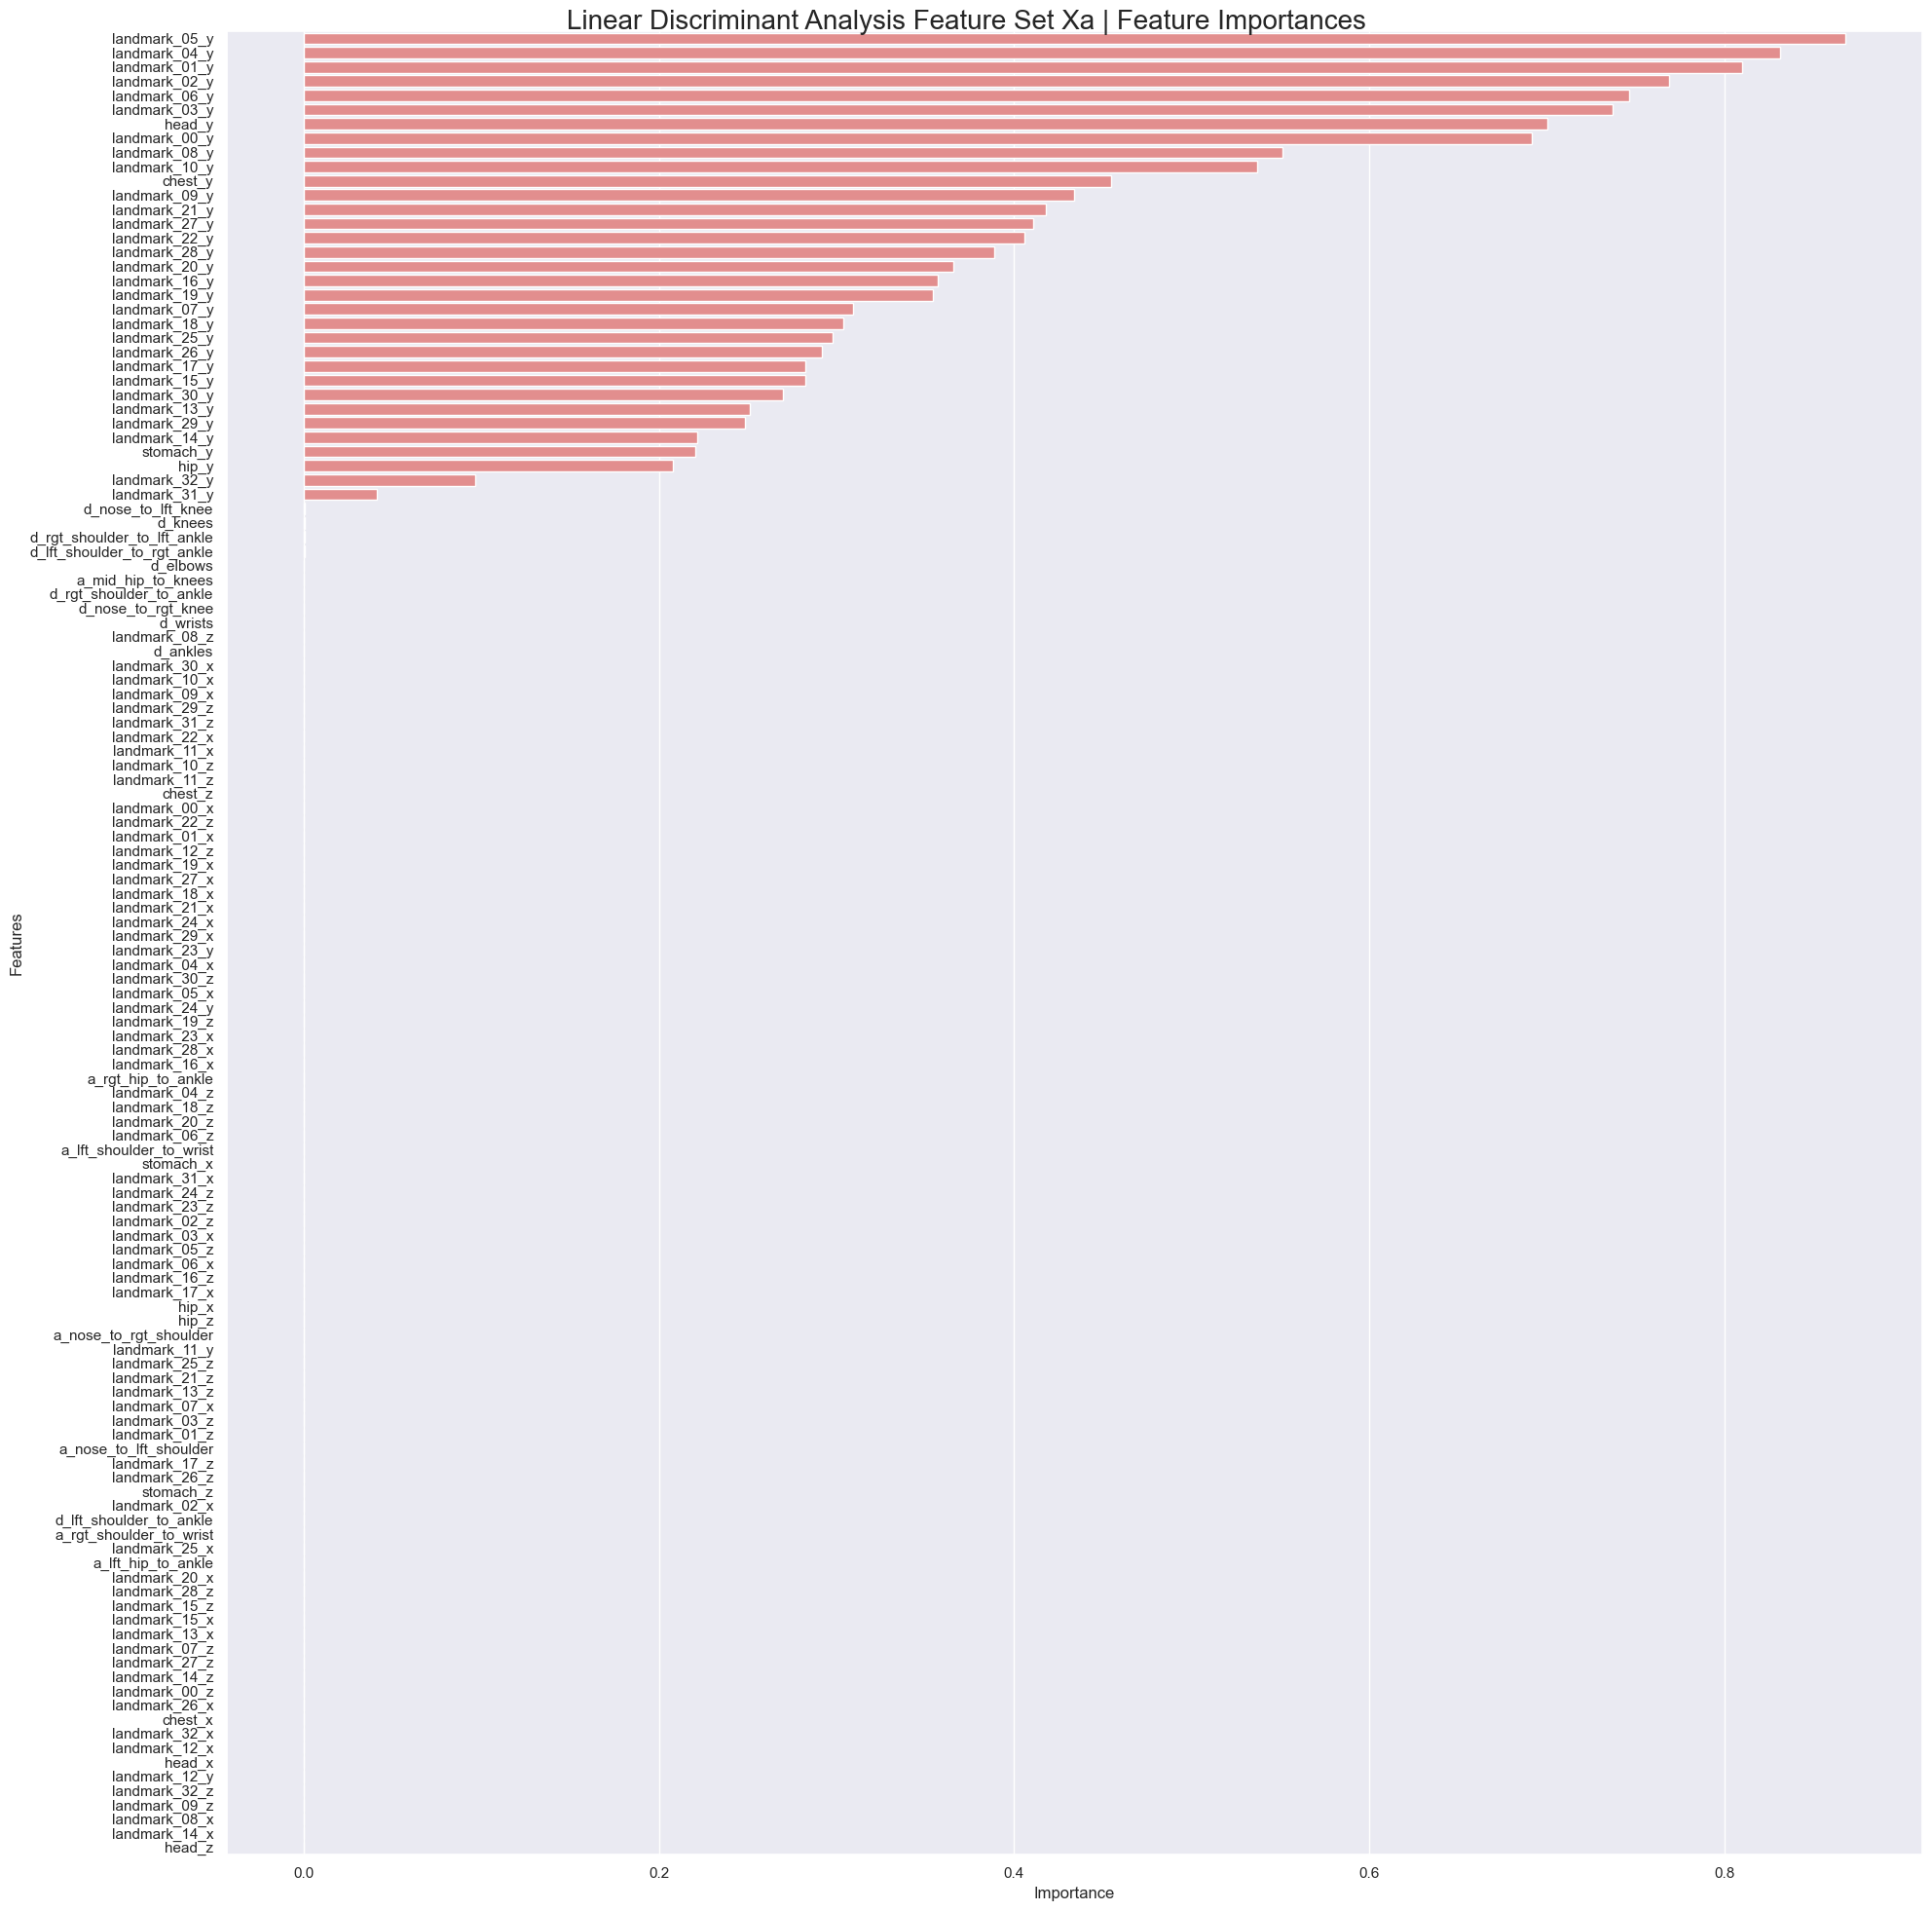

In [11]:
Xa_lda = LinearDiscriminantAnalysis(n_components=len(Xa.columns))
Xa_lda.fit(Xa, ya)
Xa_importances = permutation_importance(Xa_lda, Xa, ya, n_repeats=10)
Xa_features = Xa.columns
Xa_sorted_importances = dict(sorted(zip(Xa_features, Xa_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xa_importances_df = pd.DataFrame(list(Xa_sorted_importances.items()), columns=['feature', 'importance'])
Xa_importances_df = Xa_importances_df.sort_values(by='importance', ascending=False)
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x='importance', y='feature', data=Xa_importances_df, color='lightcoral')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.suptitle("Linear Discriminant Analysis Feature Set Xa | Feature Importances", fontsize=20)
plt.savefig("results_lda_importance_xa.png", bbox_inches='tight', dpi=150)
plt.tight_layout()
plt.show()

### Improved Augmented Dataset | Feature Set 3 | Xs

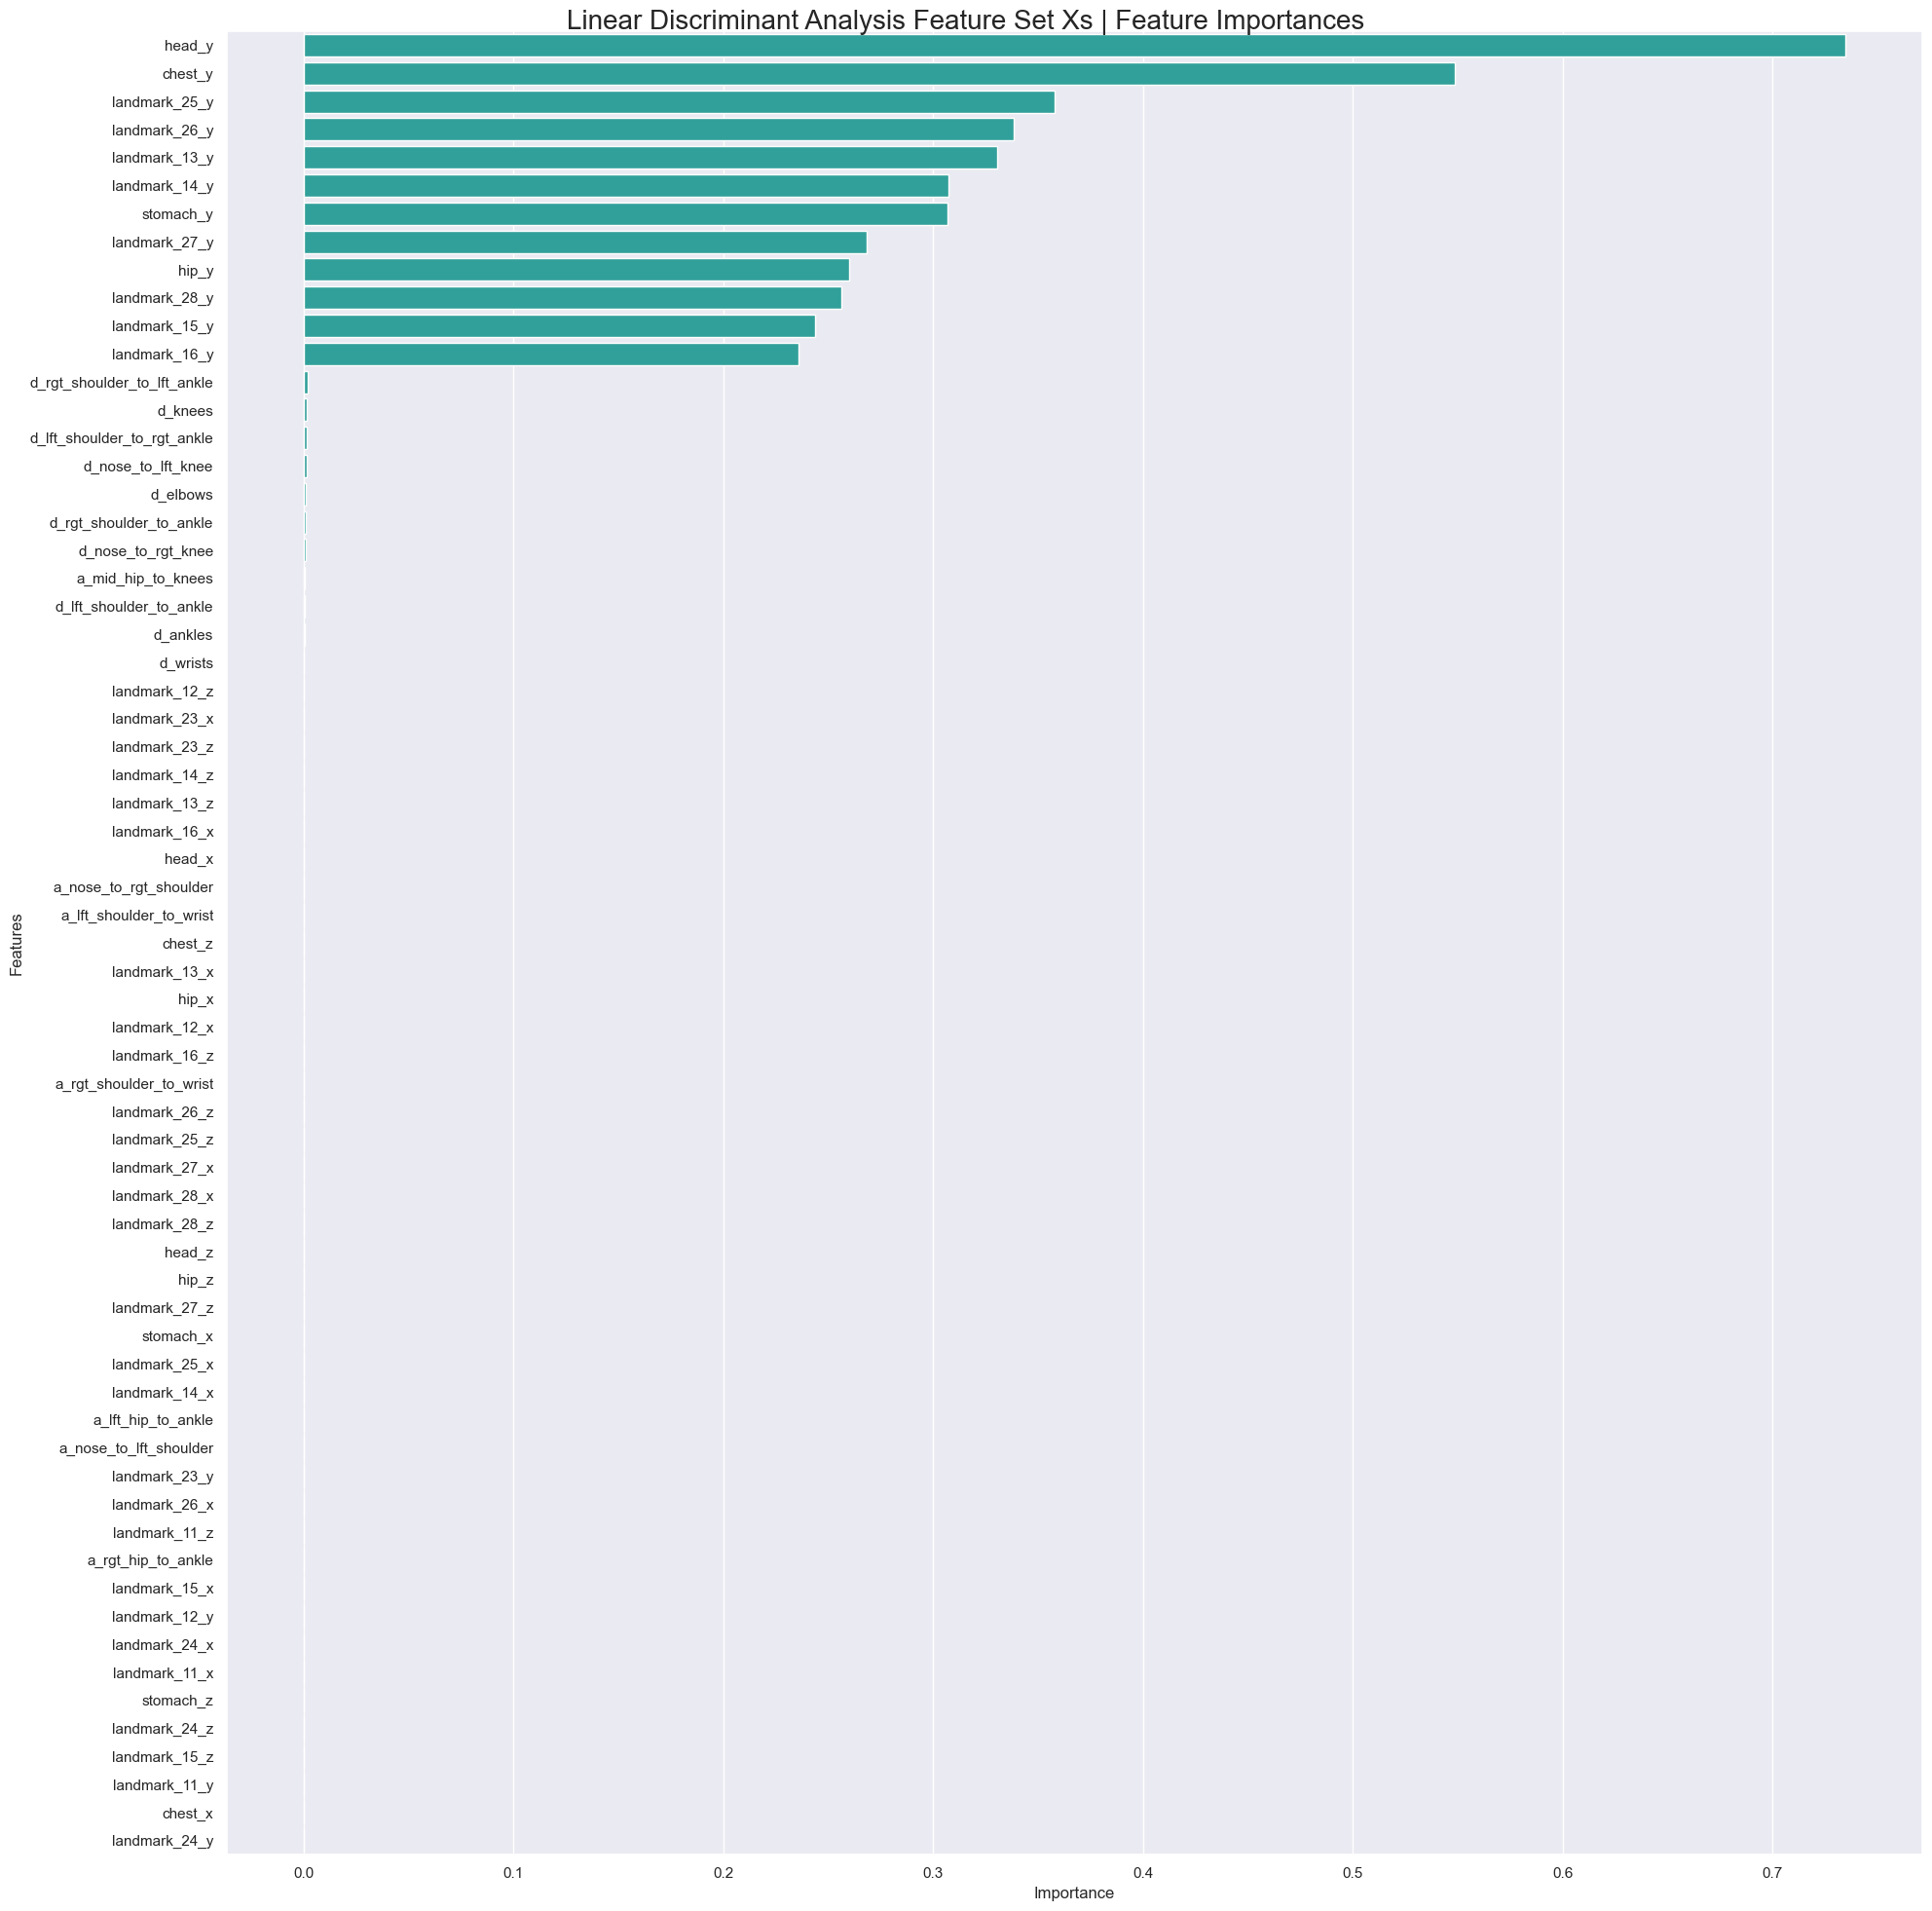

In [12]:
Xs_lda = LinearDiscriminantAnalysis(n_components=len(Xs.columns))
Xs_lda.fit(Xs, ya)
Xs_importances = permutation_importance(Xs_lda, Xs, ya, n_repeats=10)
Xs_features = Xs.columns
Xs_sorted_importances = dict(sorted(zip(Xs_features, Xs_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xs_importances_df = pd.DataFrame(list(Xs_sorted_importances.items()), columns=['feature', 'importance'])
Xs_importances_df = Xs_importances_df.sort_values(by='importance', ascending=False)

sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x='importance', y='feature', data=Xs_importances_df, color='lightseagreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.suptitle("Linear Discriminant Analysis Feature Set Xs | Feature Importances", fontsize=20)
plt.savefig("results_lda_importance_xs.png", bbox_inches='tight', dpi=150)
plt.tight_layout()
plt.show()

### Improved Augmented Dataset | Feature Set 4 | Xf

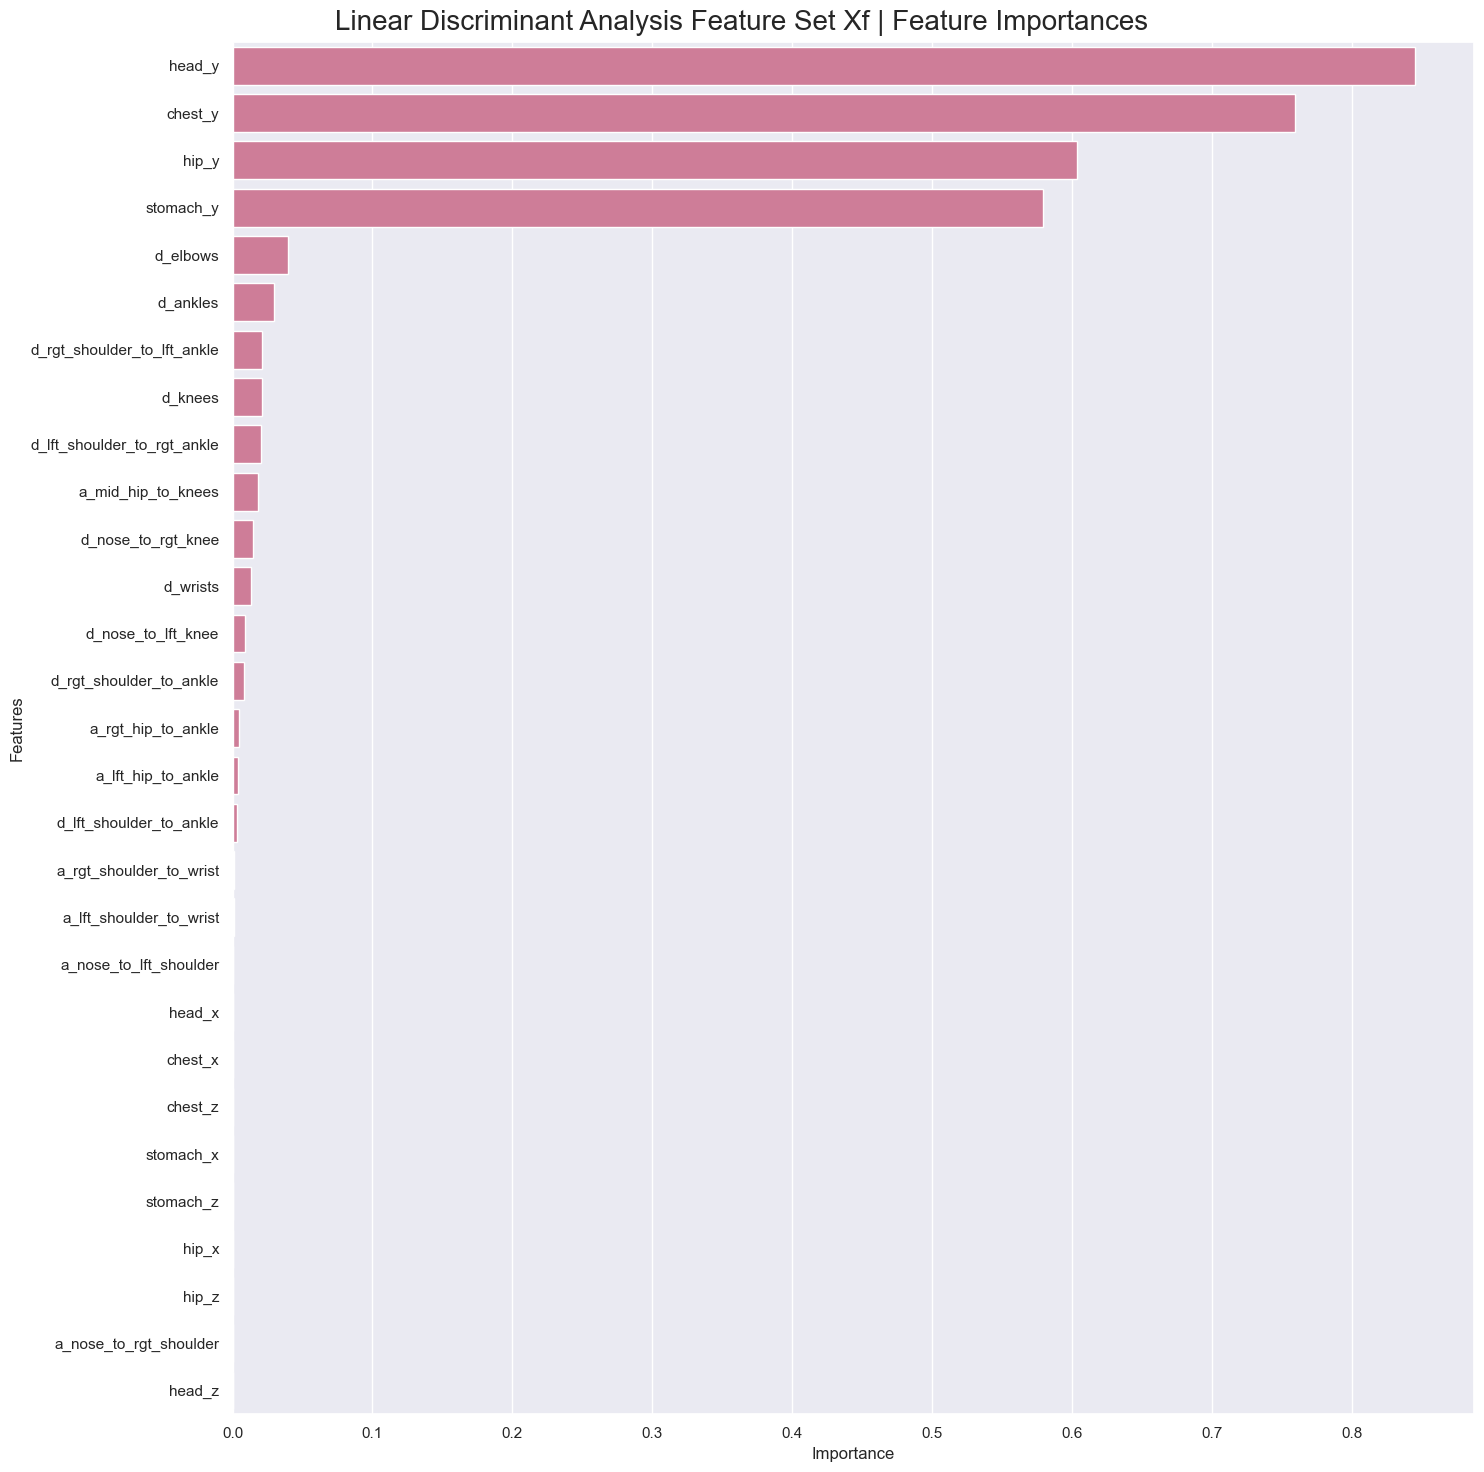

In [13]:
Xf_lda = LinearDiscriminantAnalysis(n_components=len(Xf.columns))
Xf_lda.fit(Xf, ya)
Xf_importances = permutation_importance(Xf_lda, Xf, ya, n_repeats=10)
Xf_features = Xf.columns
Xf_sorted_importances = dict(sorted(zip(Xf_features, Xf_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xf_importances_df = pd.DataFrame(list(Xf_sorted_importances.items()), columns=['feature', 'importance'])
Xf_importances_df = Xf_importances_df.sort_values(by='importance', ascending=False)

sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(x='importance', y='feature', data=Xf_importances_df, color='palevioletred')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.suptitle("Linear Discriminant Analysis Feature Set Xf | Feature Importances", fontsize=20)
plt.savefig("results_lda_importance_xf.png", bbox_inches='tight', dpi=150)
plt.tight_layout()
plt.show()

## 5.4 KNN Validation

### Import Test Data

In [16]:
Xt1 = pd.read_csv('data/test/processed/superman/01/pose_data_res2.csv')
Xt1 = Xt1.loc[:, ~Xt1.columns.str.contains('_v')]
Xt2 = pd.read_csv('data/test/processed/superman/02/pose_data_res2.csv')
Xt2 = Xt2.loc[:, ~Xt2.columns.str.contains('_v')]
Xt3 = pd.read_csv('data/test/processed/superman/02/pose_data_res2.csv')
Xt3 = Xt3.loc[:, ~Xt3.columns.str.contains('_v')]

Xt4 = pd.read_csv('data/test/processed/crucifix/01/pose_data_res2.csv')
Xt4 = Xt4.loc[:, ~Xt4.columns.str.contains('_v')]
Xt5 = pd.read_csv('data/test/processed/crucifix/02/pose_data_res2.csv')
Xt5 = Xt5.loc[:, ~Xt5.columns.str.contains('_v')]
Xt6 = pd.read_csv('data/test/processed/crucifix/02/pose_data_res2.csv')
Xt6 = Xt6.loc[:, ~Xt6.columns.str.contains('_v')]

Xt7 = pd.read_csv('data/test/processed/fireman/01/pose_data_res2.csv')
Xt7 = Xt7.loc[:, ~Xt7.columns.str.contains('_v')]
Xt8 = pd.read_csv('data/test/processed/fireman/02/pose_data_res2.csv')
Xt8 = Xt8.loc[:, ~Xt8.columns.str.contains('_v')]
Xt9 = pd.read_csv('data/test/processed/fireman/02/pose_data_res2.csv')
Xt9 = Xt9.loc[:, ~Xt9.columns.str.contains('_v')]

### Important Features using LDA vs. Manual Selection

In [15]:
# LDA Reduced Features
Xa_important_features = Xa_importances_df[Xa_importances_df['importance'] > 0.1]['feature'].values
Xs_important_features = Xs_importances_df[Xs_importances_df['importance'] > 0.1]['feature'].values
Xf_important_features = Xf_importances_df[Xf_importances_df['importance'] > 0.1]['feature'].values

# Manual Selected Features
Xa_manual_features = Xa.columns.values
Xs_manual_features = Xs.columns.values
Xf_manual_features = Xf.columns.values

print(len(Xa_important_features))
print(len(Xs_important_features))
print(len(Xf_important_features))

31
12
4


### Model Configuration

In [25]:
optimal_k = 1
input_metric = 'euclidean'
input_weights = 'distance'

Xa_lda_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xs_lda_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xf_lda_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xa_manual_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xs_manual_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xf_manual_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)

Xa_lda_knn.fit(Xa[Xa_important_features], poses)
Xs_lda_knn.fit(Xs[Xs_important_features], poses)
Xf_lda_knn.fit(Xf[Xf_important_features], poses)
Xa_manual_knn.fit(Xa[Xa_manual_features], poses)
Xs_manual_knn.fit(Xs[Xs_manual_features], poses)
Xf_manual_knn.fit(Xf[Xf_manual_features], poses)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

**Test Category: Superman**

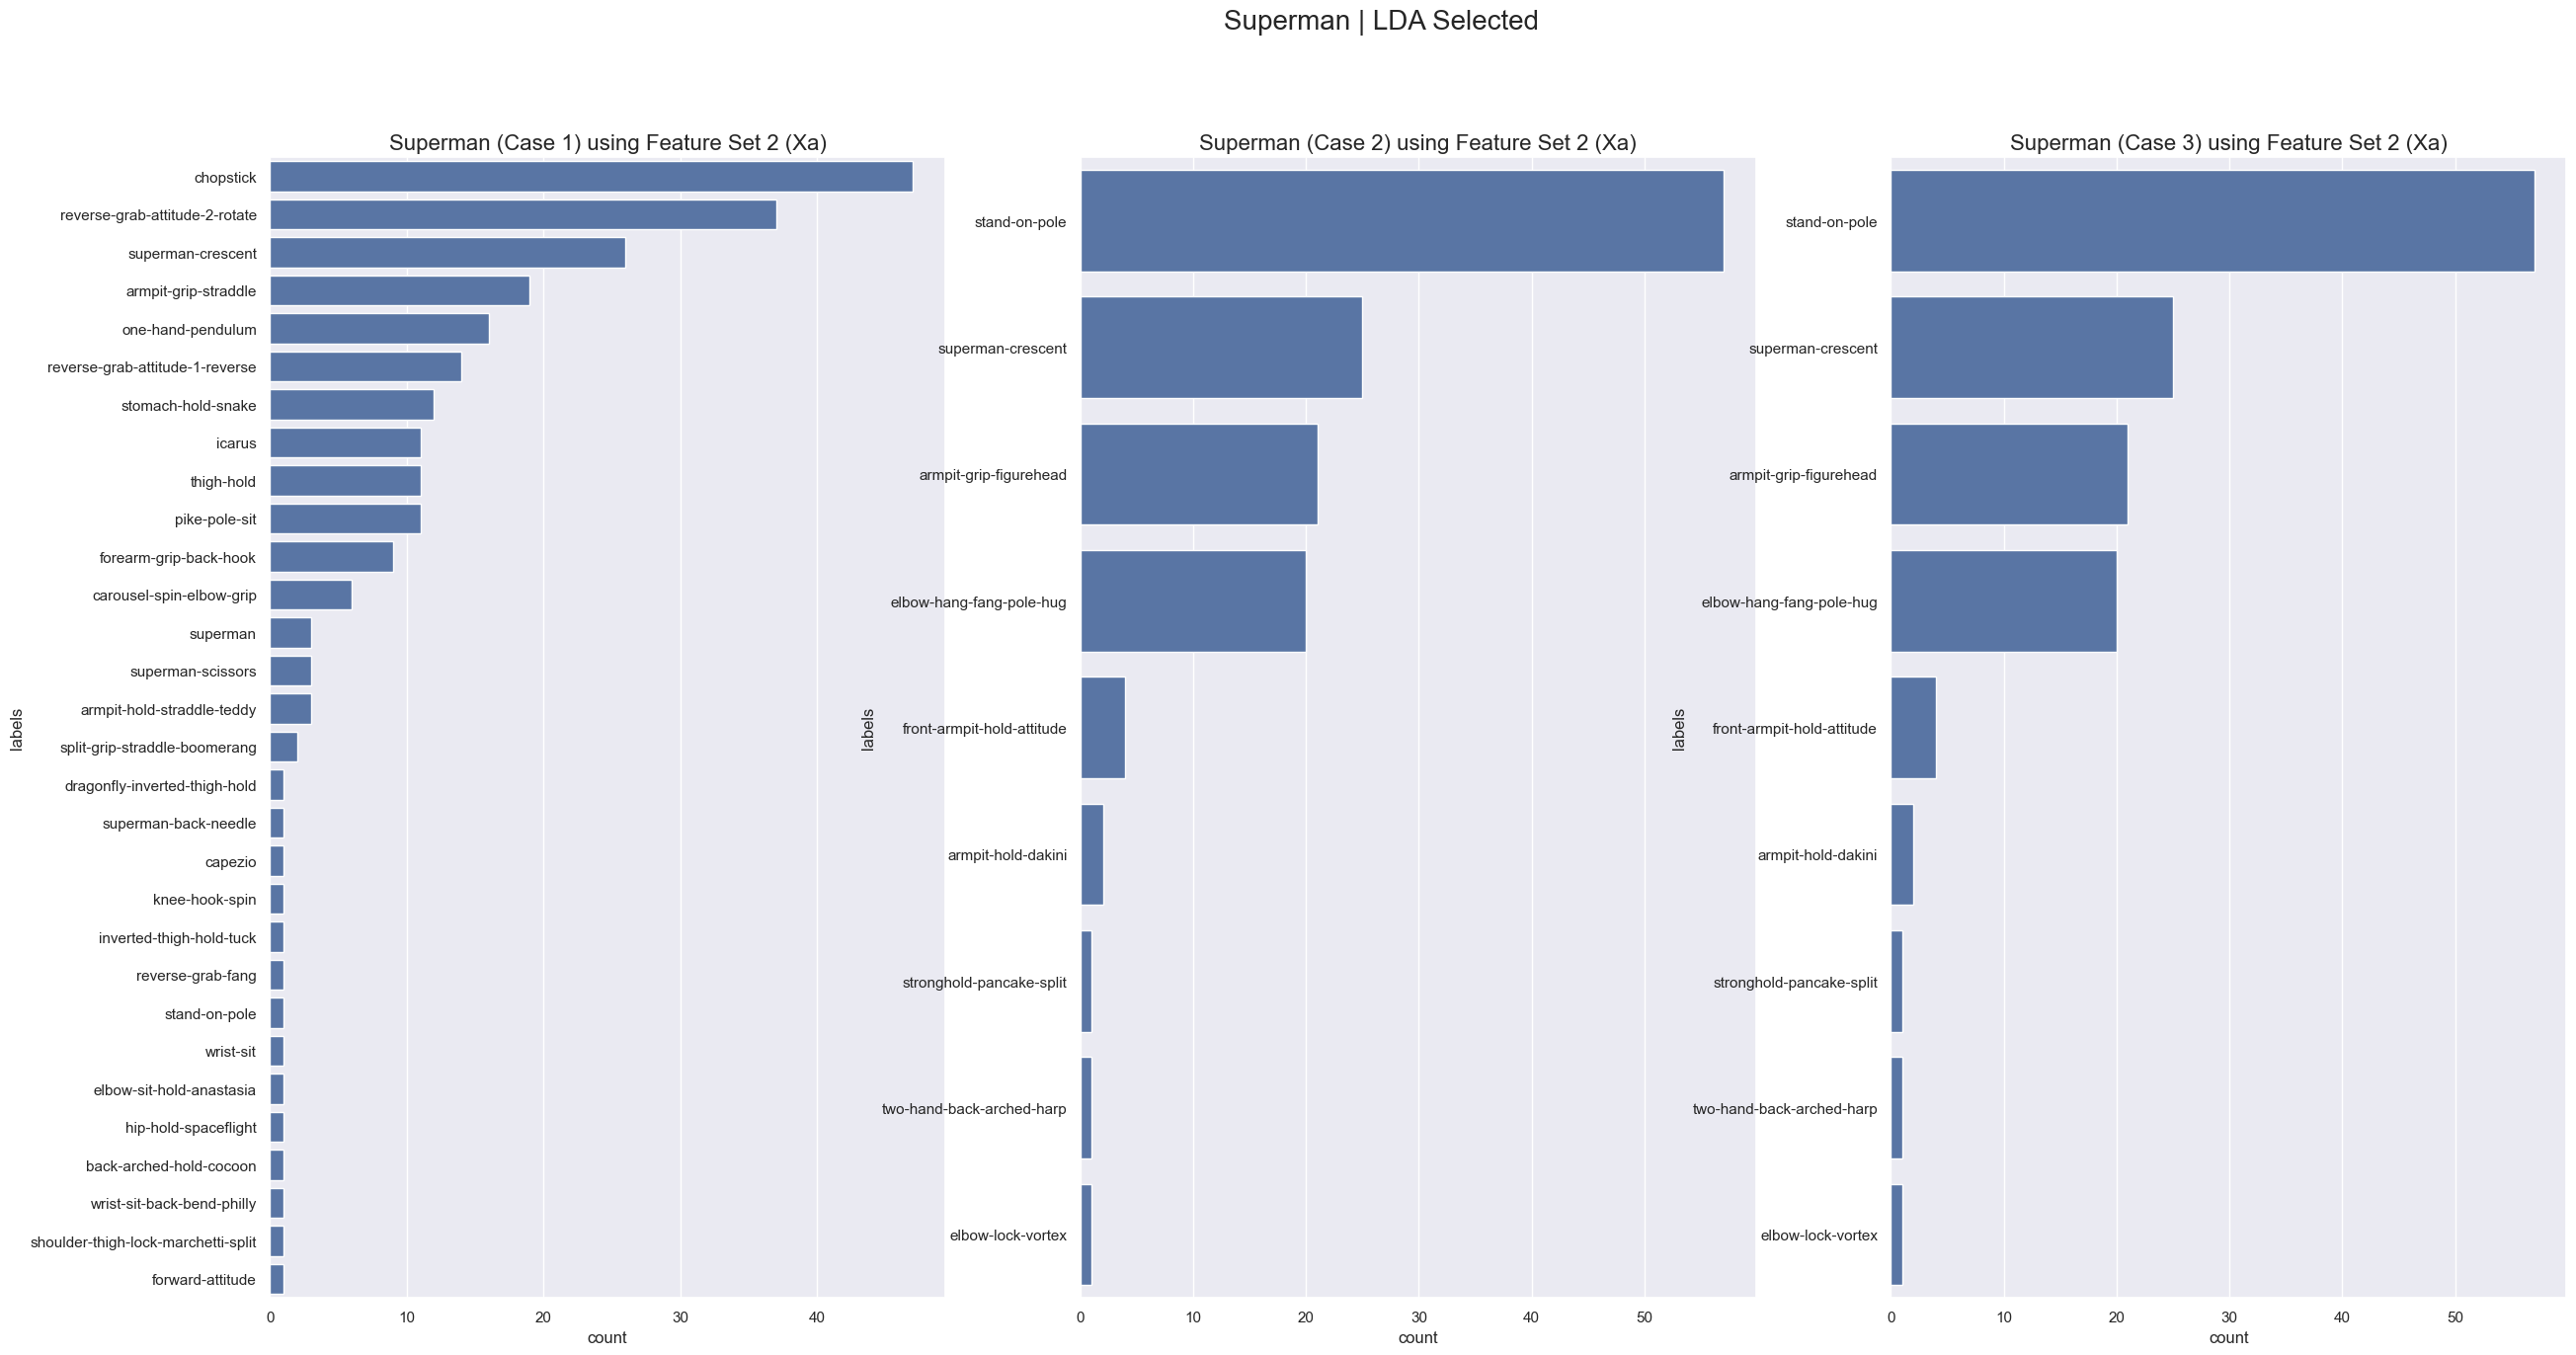

In [26]:
test_category = 'Superman'
feature_selection = 'LDA Selected'

# Test Case: Xt1
Xa_y_pred1 = Xa_lda_knn.predict(Xt1[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt2
Xa_y_pred2 = Xa_lda_knn.predict(Xt2[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt3
Xa_y_pred3 = Xa_lda_knn.predict(Xt3[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

fig.savefig("trial3_knn_superman_lda.png",dpi=150)

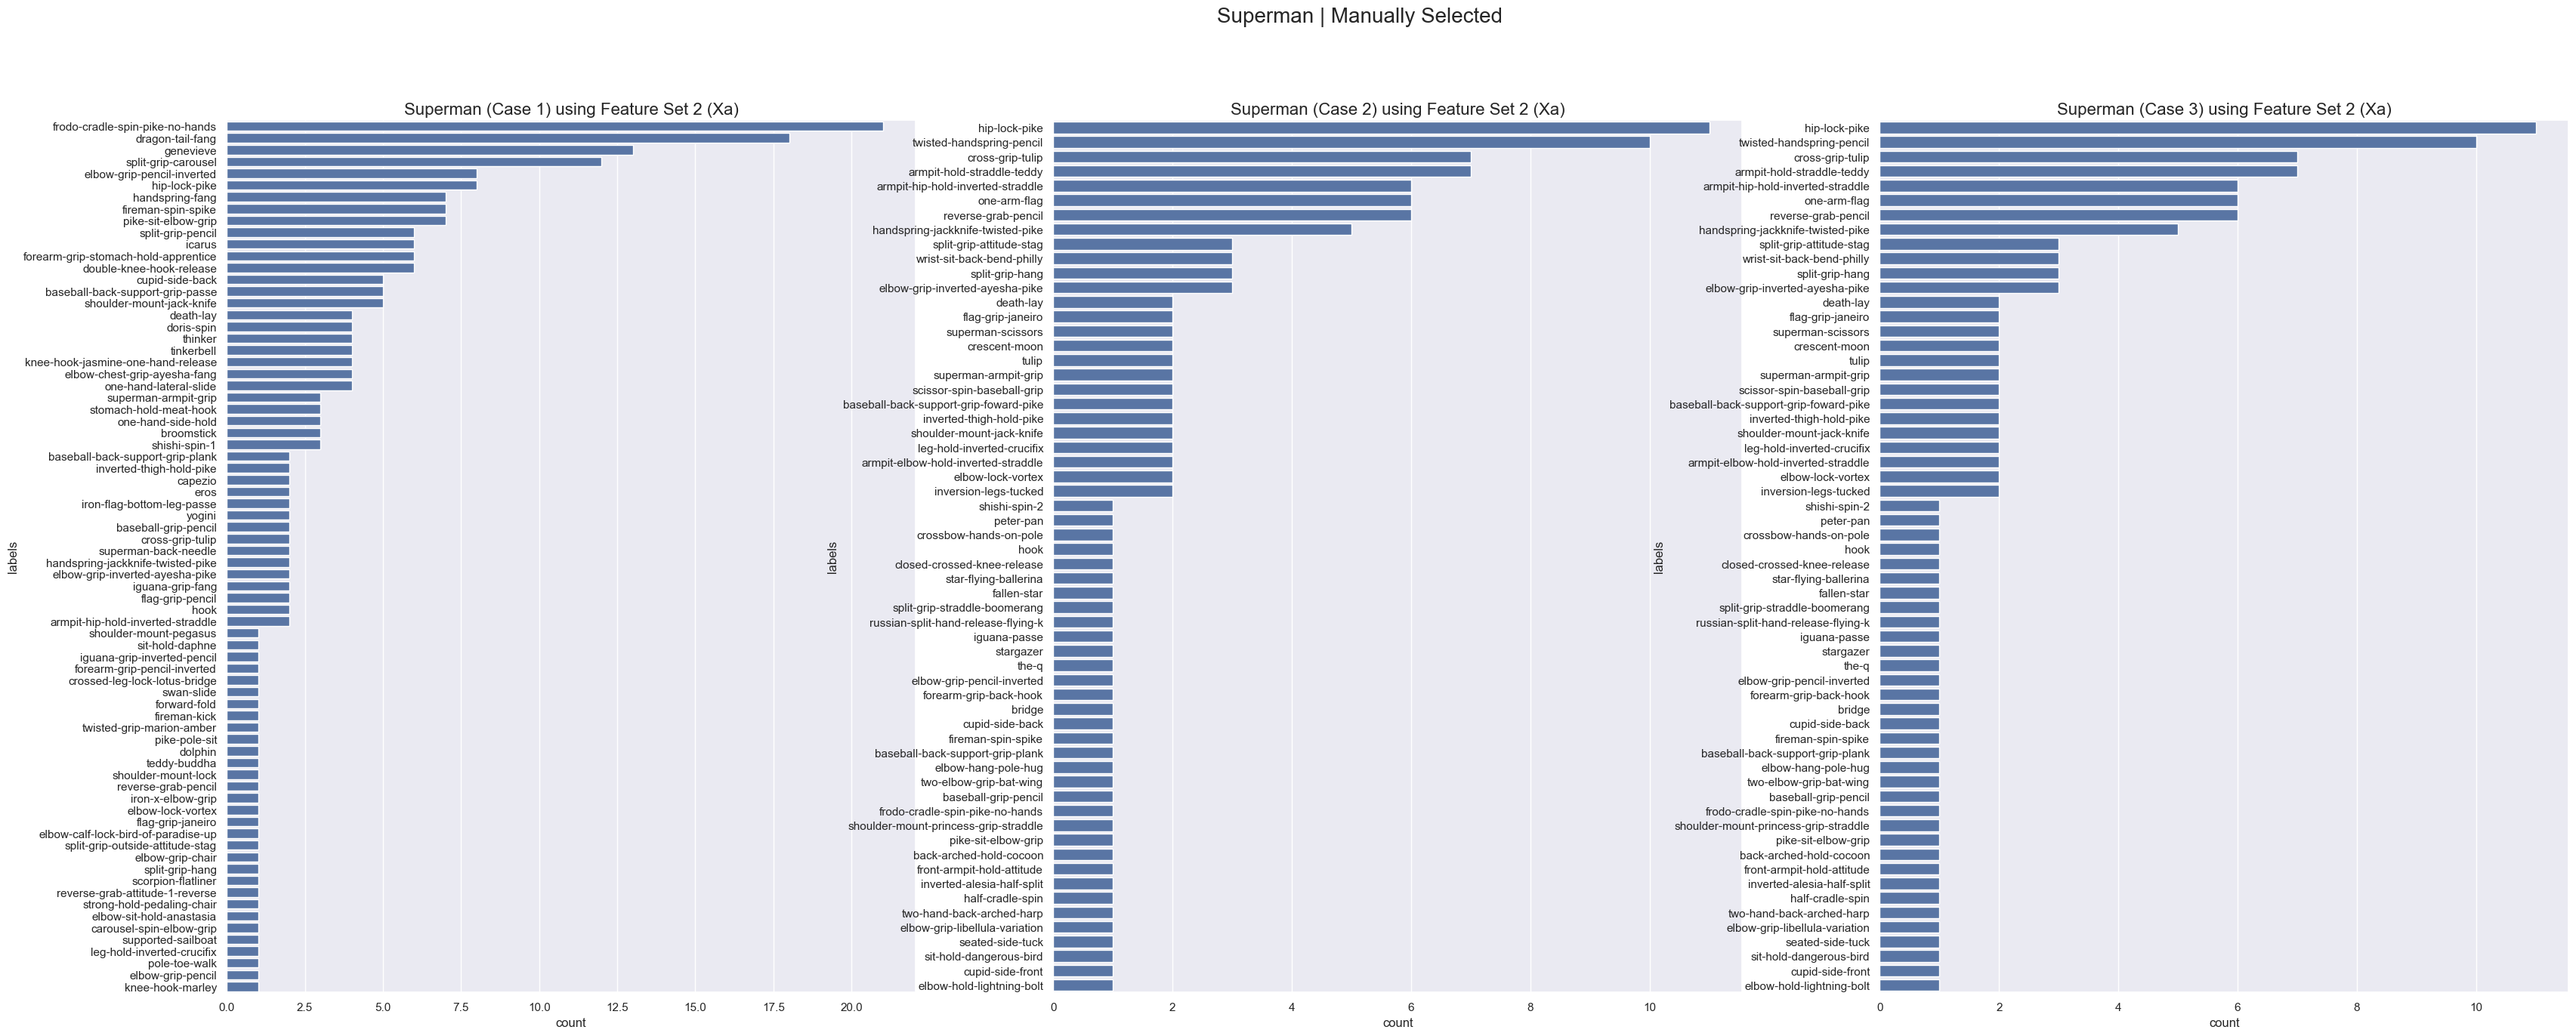

In [27]:
feature_selection = 'Manually Selected'

# Test Case: Xt1
Xa_y_pred1 = Xa_manual_knn.predict(Xt1[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt2
Xa_y_pred2 = Xa_manual_knn.predict(Xt2[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt3
Xa_y_pred3 = Xa_manual_knn.predict(Xt3[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(40, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

plt.savefig("trial3_knn_superman_all.png",dpi=150)

**Test Category: Crucifix**

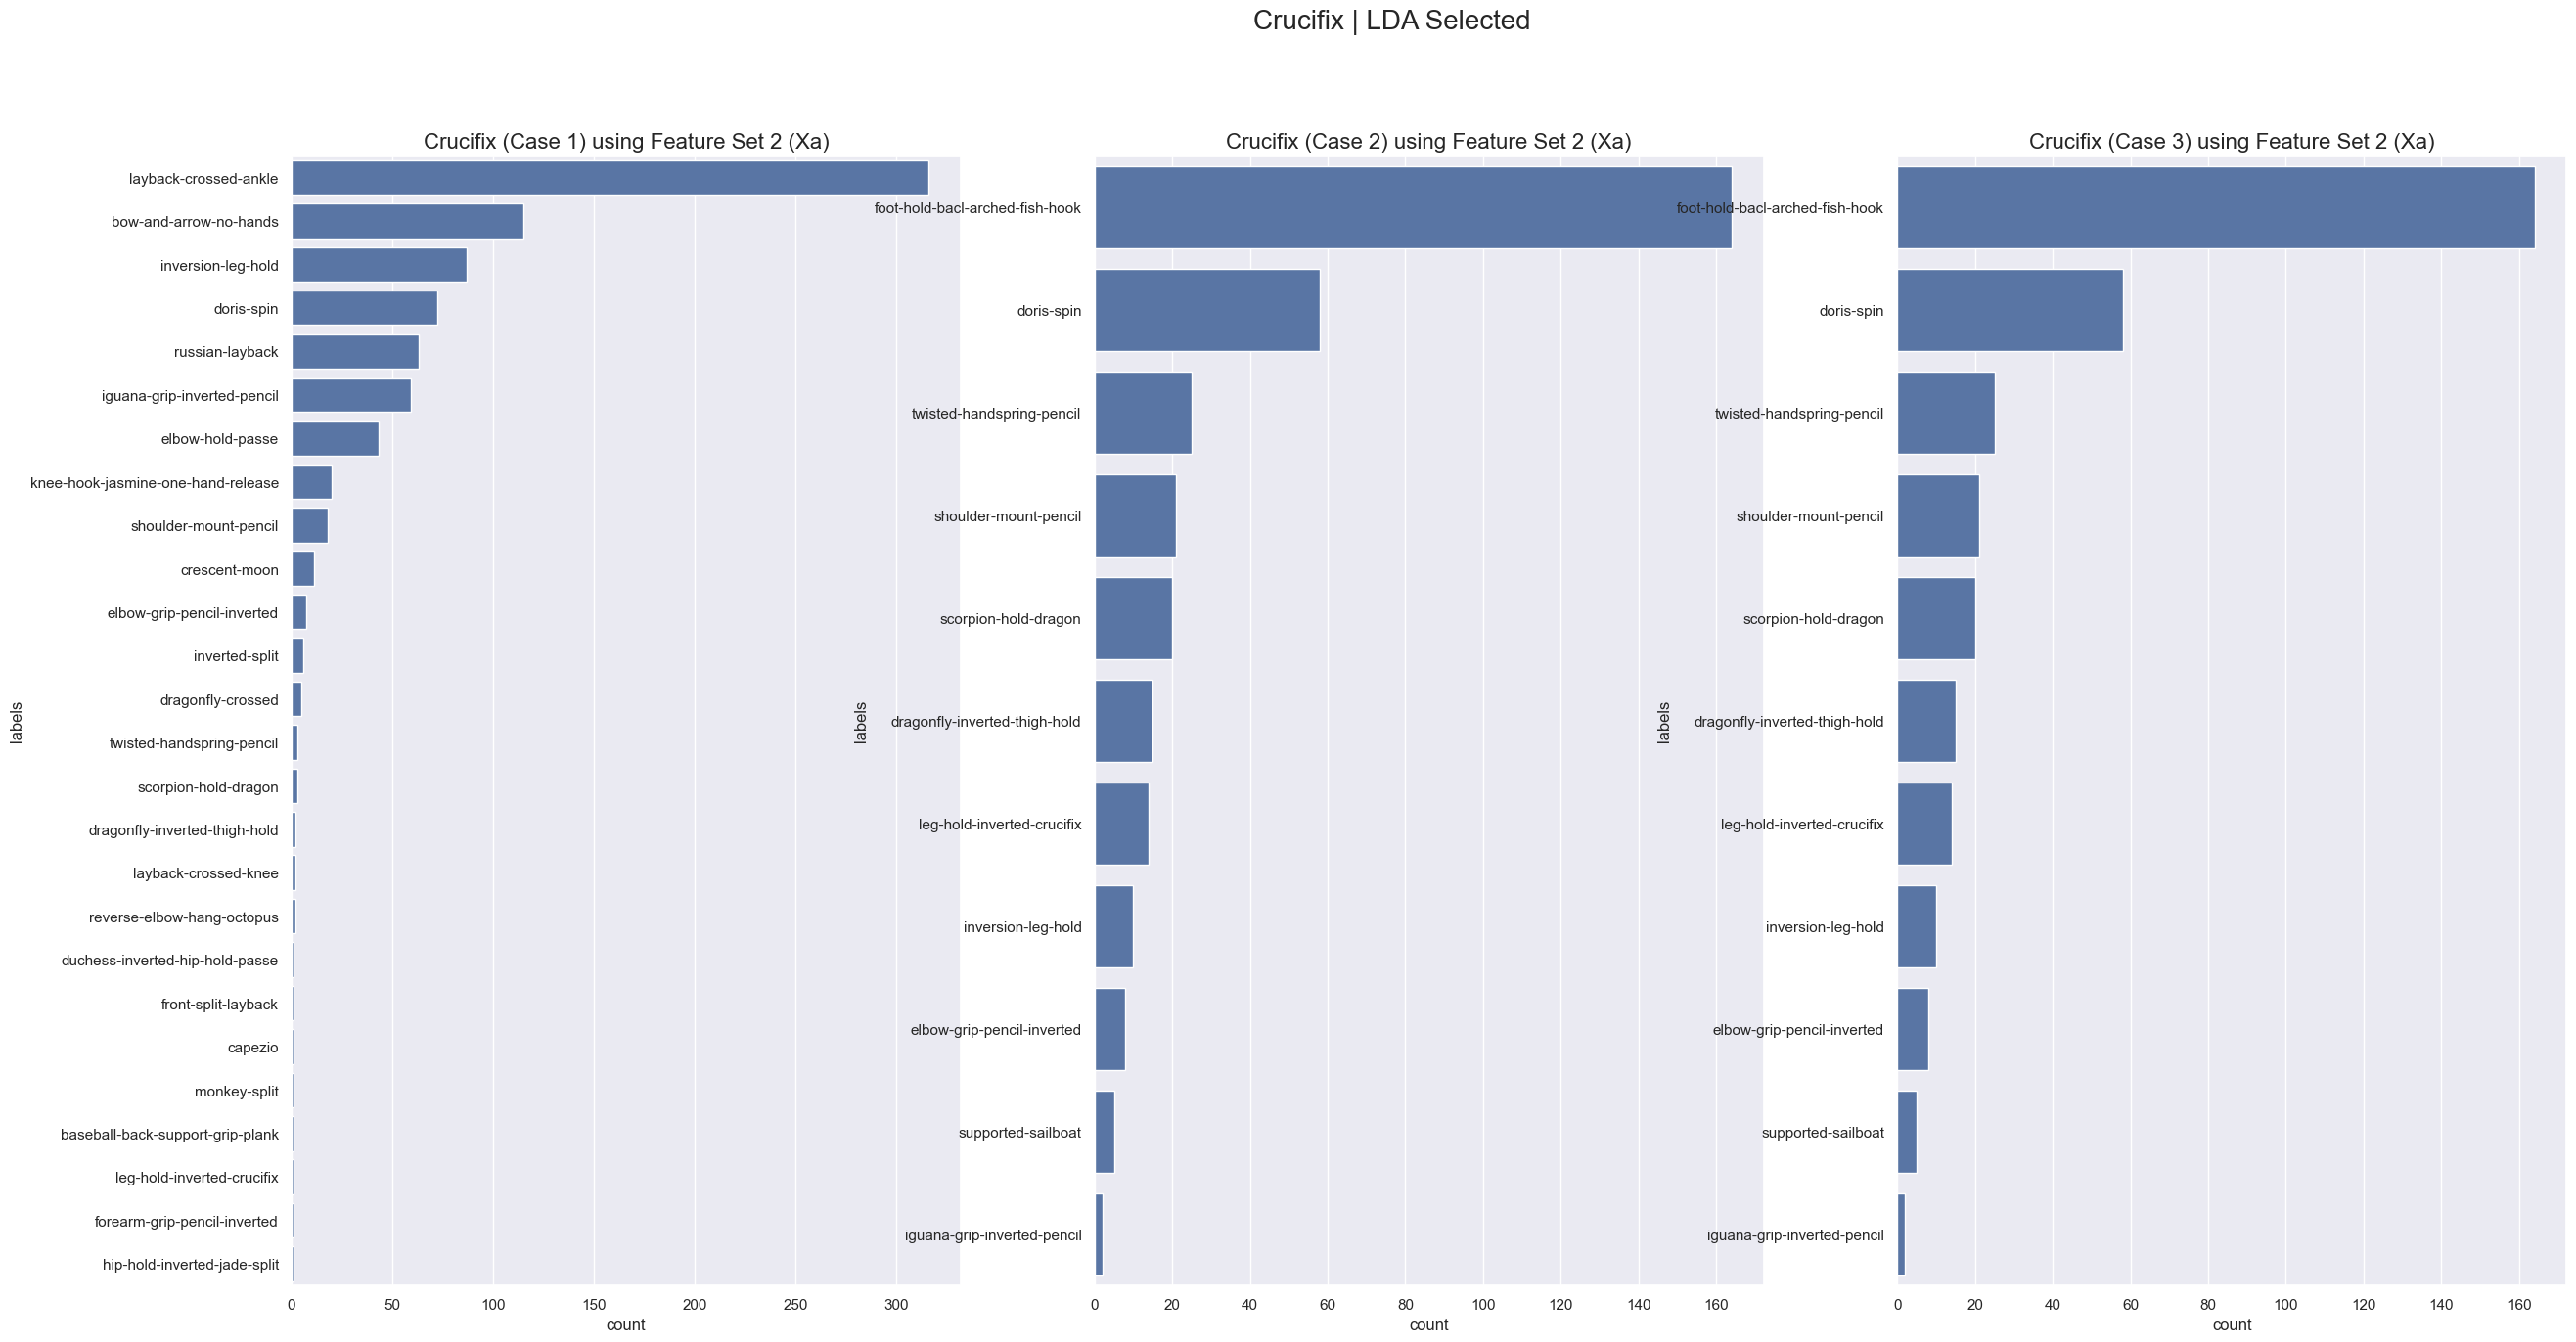

In [28]:
test_category = 'Crucifix'
feature_selection = 'LDA Selected'

# Test Case: Xt4
Xa_y_pred1 = Xa_lda_knn.predict(Xt4[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt5
Xa_y_pred2 = Xa_lda_knn.predict(Xt5[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt6
Xa_y_pred3 = Xa_lda_knn.predict(Xt6[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

fig.savefig("trial3_knn_crucifix_lda.png",dpi=150)

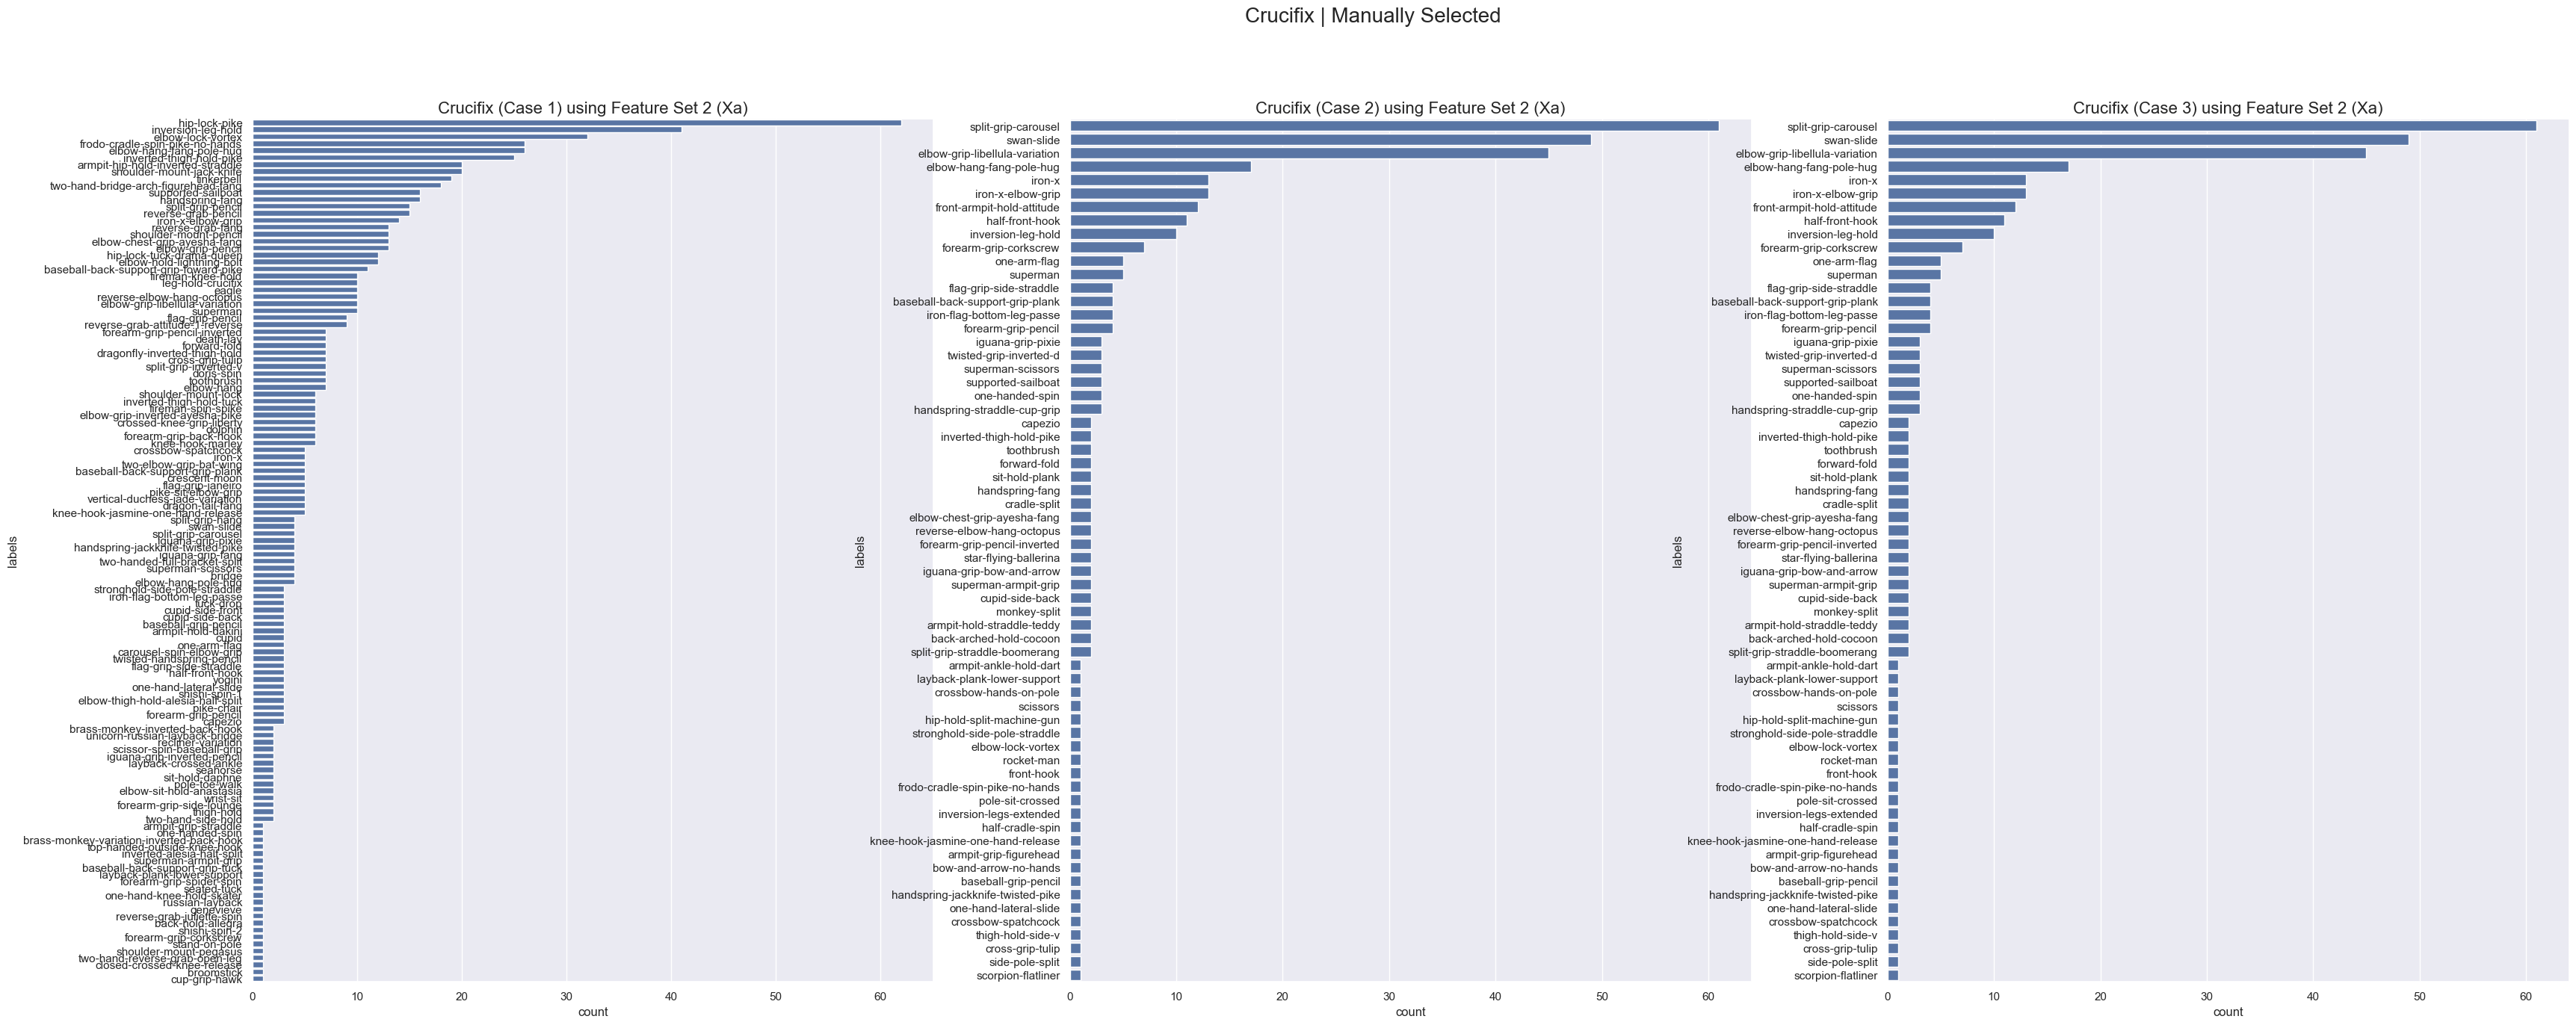

In [29]:
feature_selection = 'Manually Selected'

# Test Case: Xt4
Xa_y_pred1 = Xa_manual_knn.predict(Xt4[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt5
Xa_y_pred2 = Xa_manual_knn.predict(Xt5[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt6
Xa_y_pred3 = Xa_manual_knn.predict(Xt6[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(40, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

plt.savefig("trial3_knn_crucifix_all.png",dpi=150)

**Test Category:Fireman**

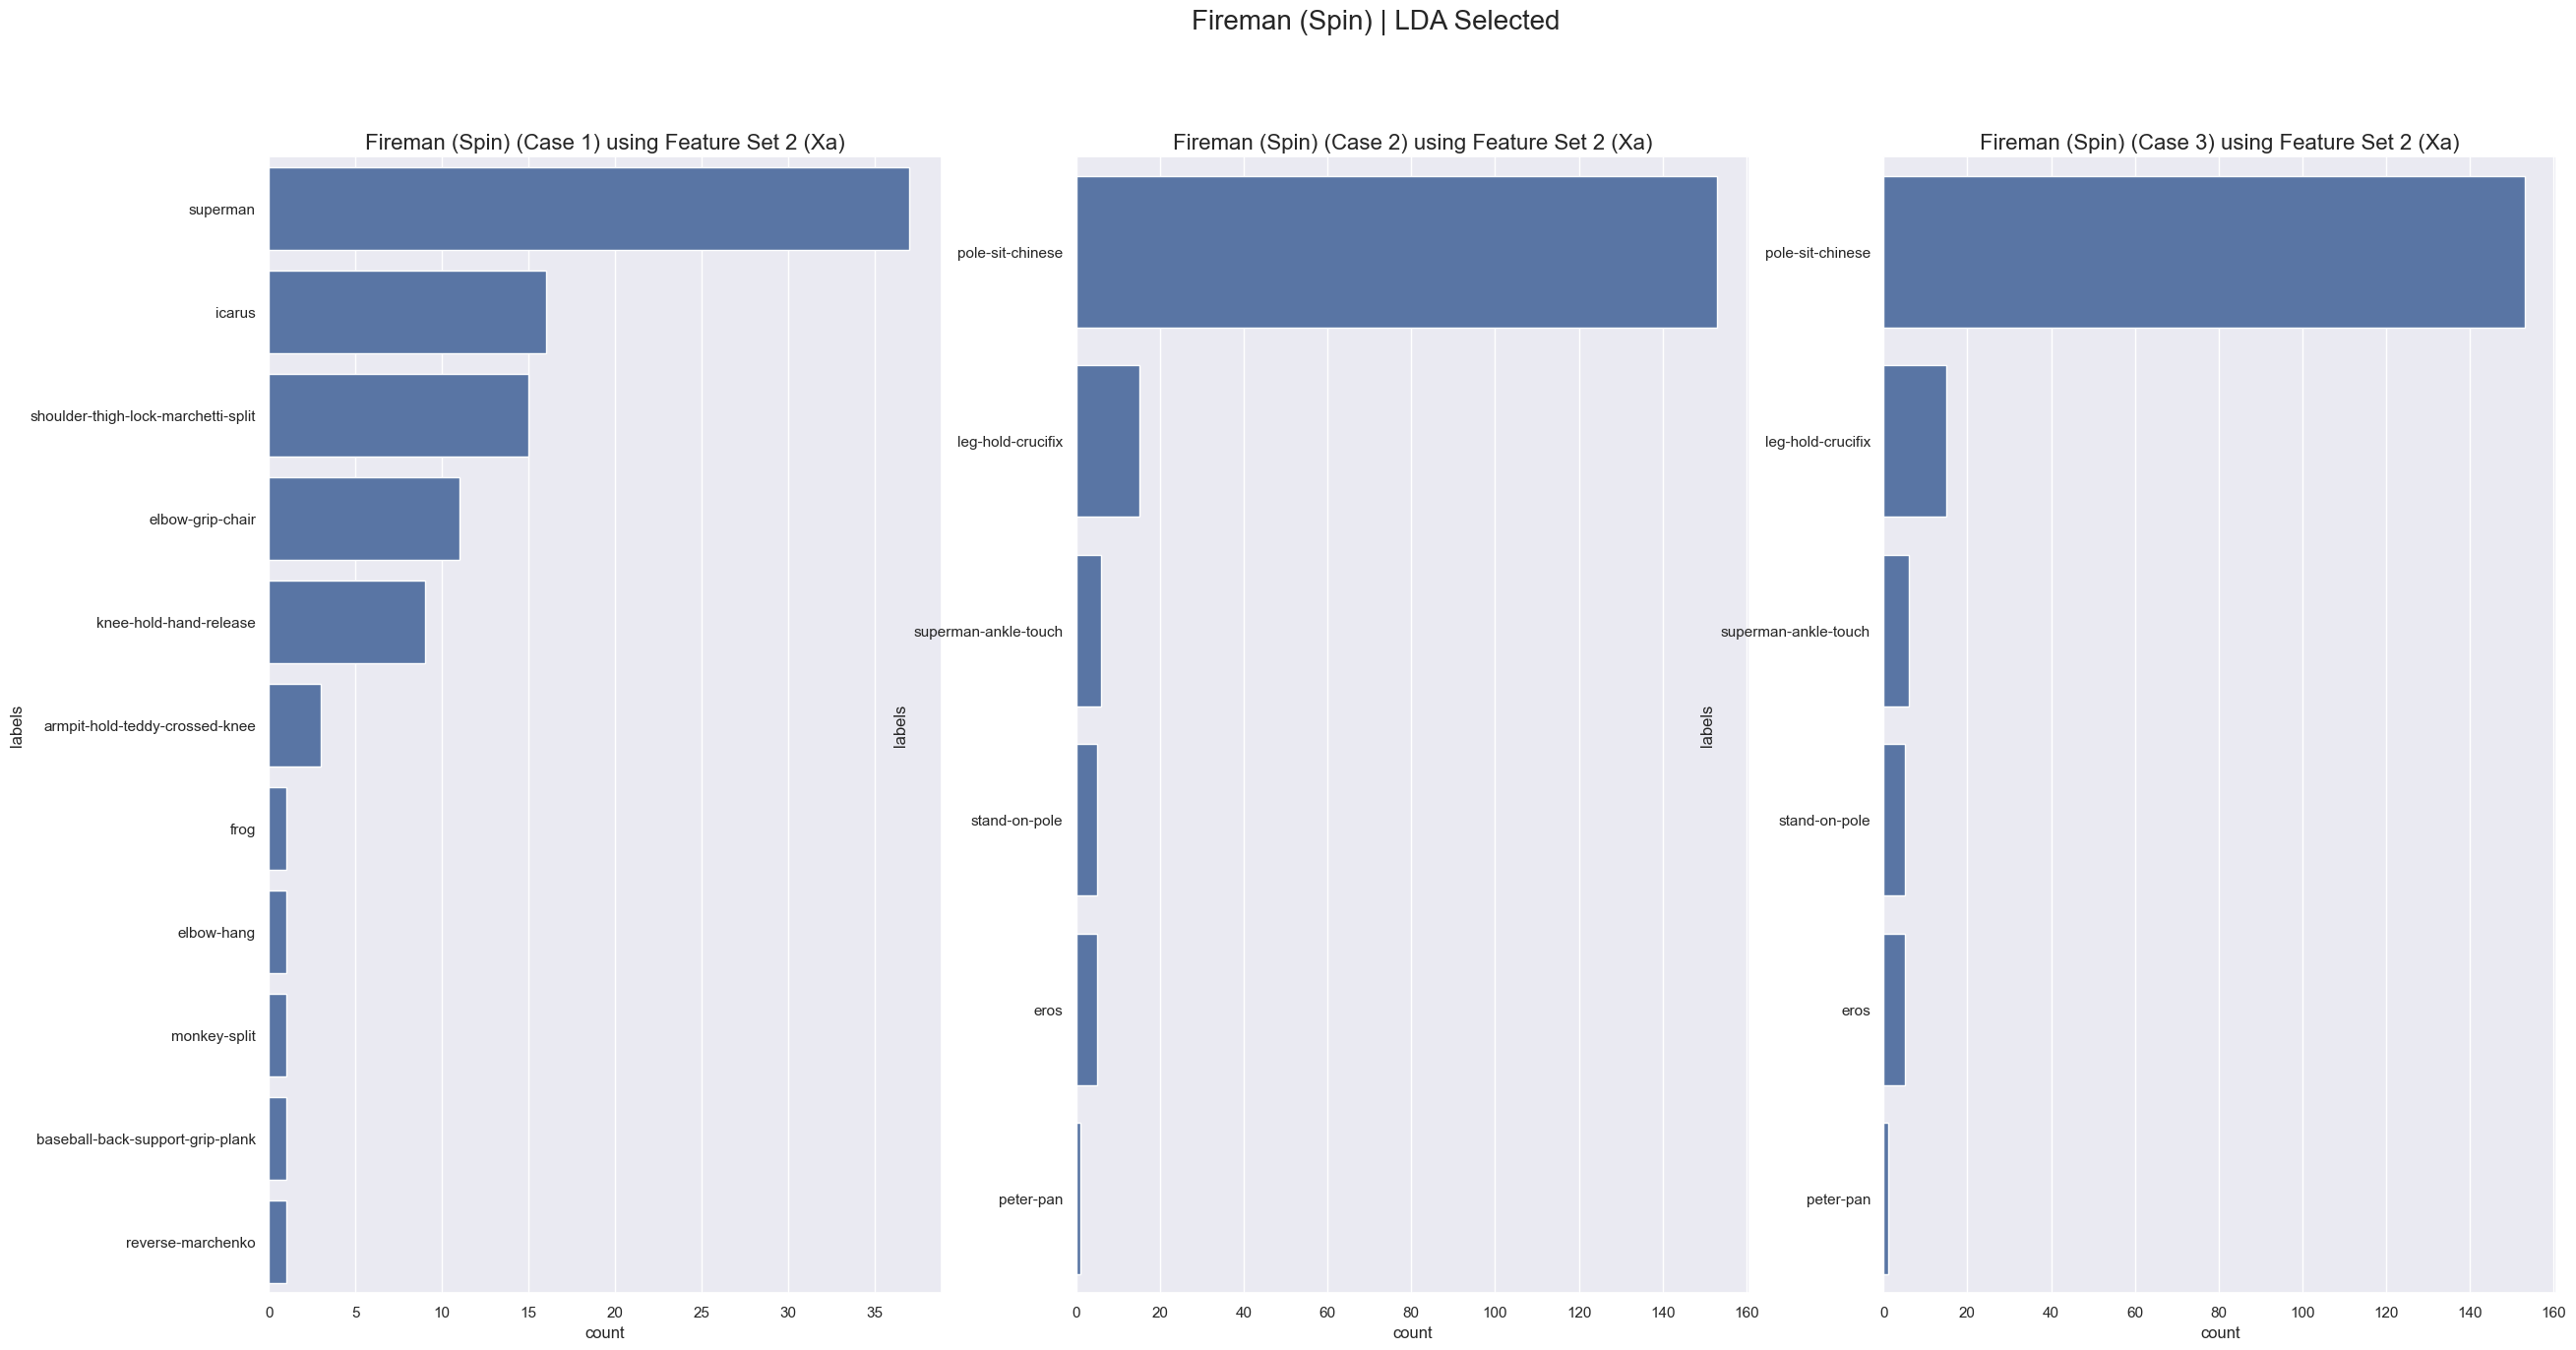

In [30]:
test_category = 'Fireman (Spin)'
feature_selection = 'LDA Selected'

# Test Case: Xt7
Xa_y_pred1 = Xa_lda_knn.predict(Xt7[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt8
Xa_y_pred2 = Xa_lda_knn.predict(Xt8[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt9
Xa_y_pred3 = Xa_lda_knn.predict(Xt9[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

fig.savefig("trial3_knn_fireman_lda.png",dpi=150)

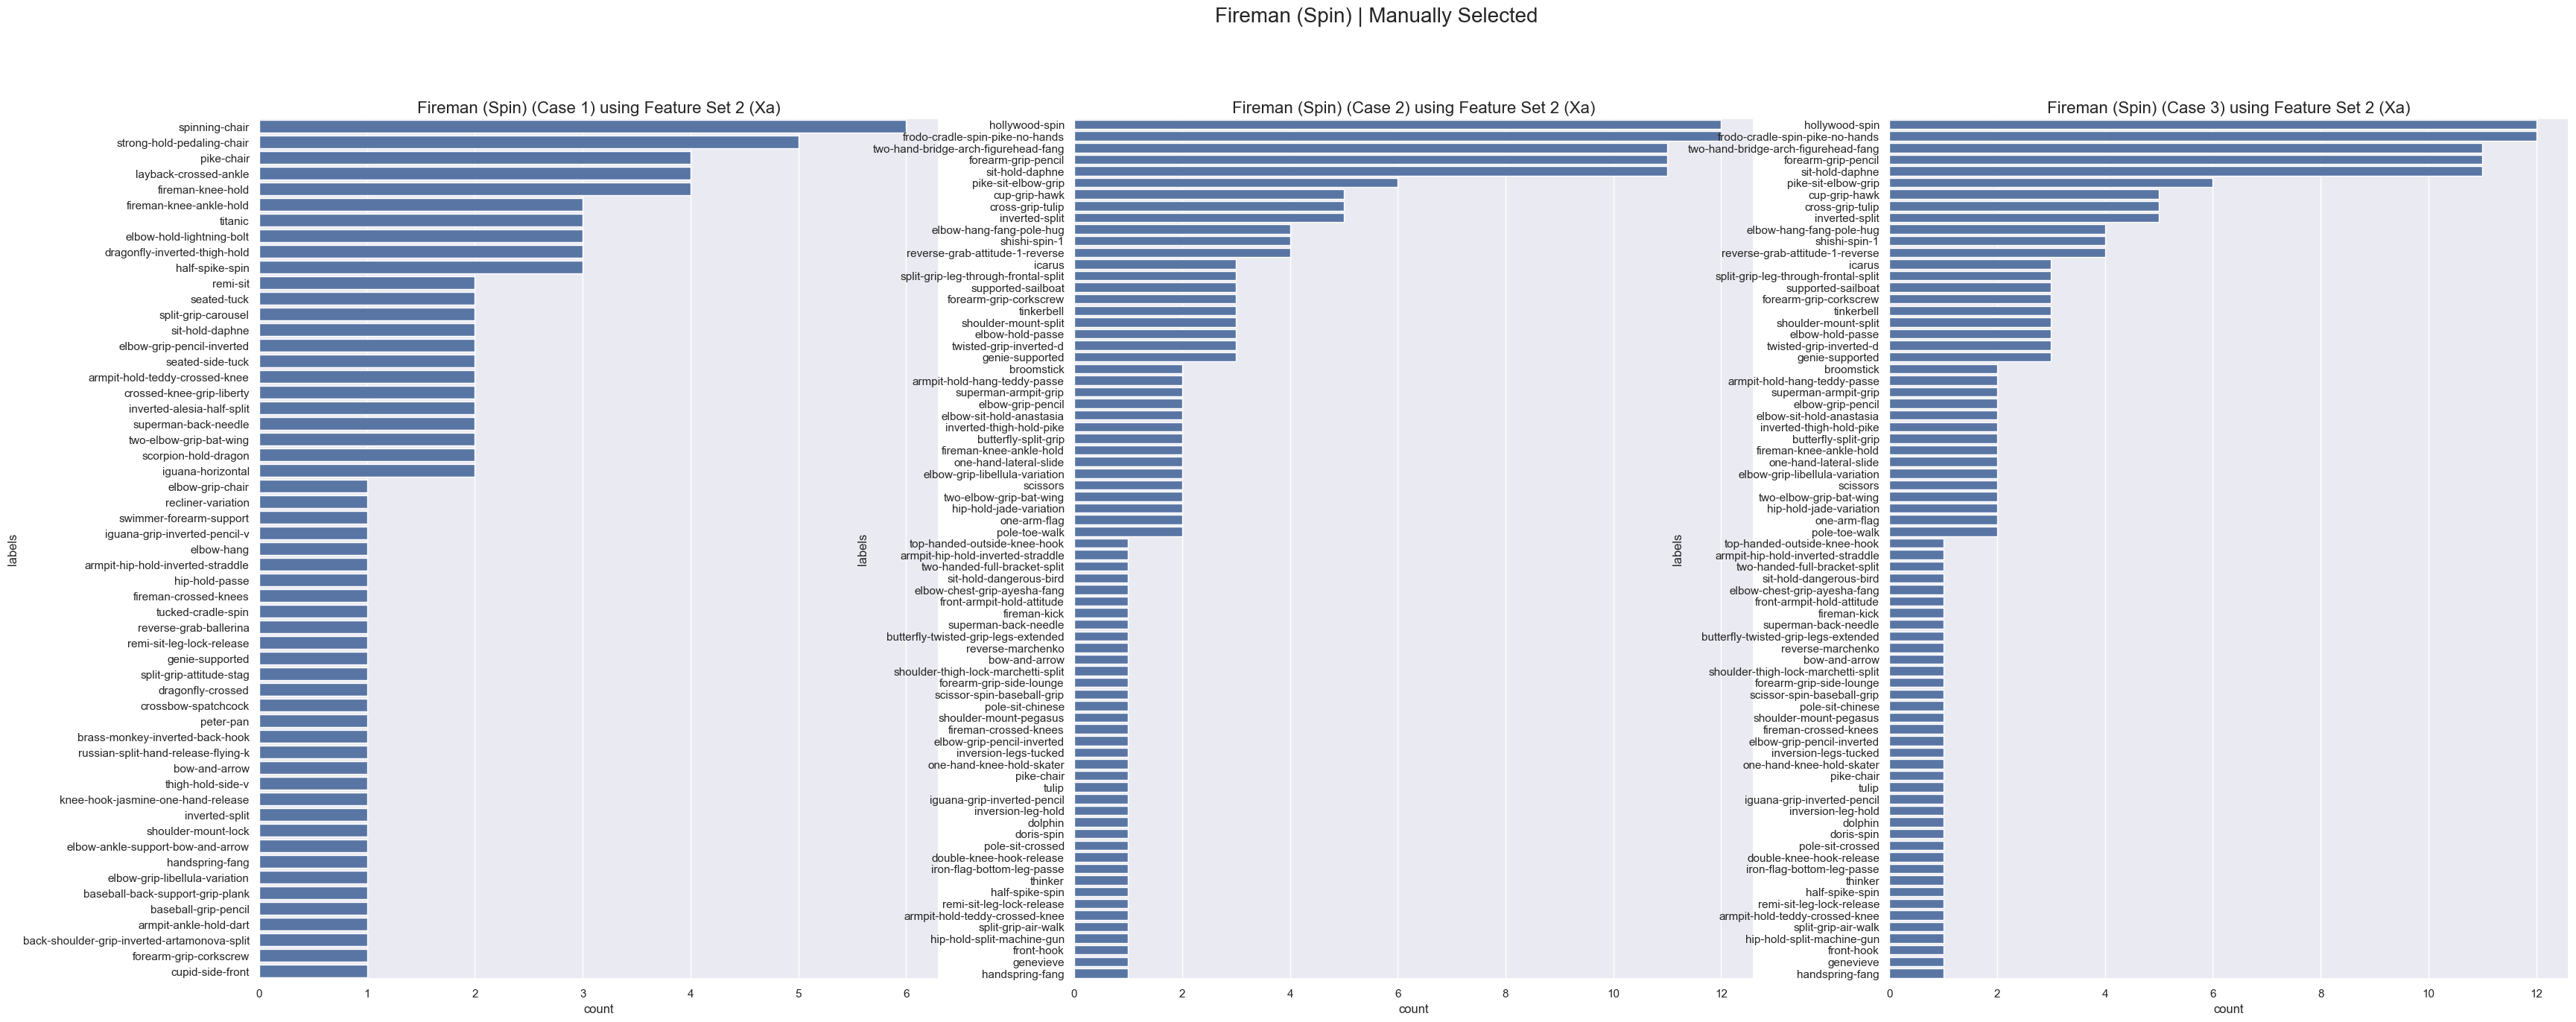

In [31]:
feature_selection = 'Manually Selected'

# Test Case: Xt7
Xa_y_pred1 = Xa_manual_knn.predict(Xt7[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

# Test Case: Xt8
Xa_y_pred2 = Xa_manual_knn.predict(Xt8[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

# Test Case: Xt9
Xa_y_pred3 = Xa_manual_knn.predict(Xt9[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(40, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2])

plt.savefig("trial3_knn_fireman_all.png",dpi=150)